# Data Uploading

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.read_csv("world_cups/WorldCupMatches.csv")

In [3]:
df_us = df_1[["Year", "Home Team Name", "Home Team Goals", "Away Team Goals", "Away Team Name"]]

In [4]:
df_us.dropna(inplace = True)
df_us

/var/folders/m_/0nn_4m_96w968hhcd3n4206w0000gn/T/ipykernel_63623/1812310629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.dropna(inplace = True)


,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,France,4.0,1.0,Mexico
1,1930.0,USA,3.0,0.0,Belgium
2,1930.0,Yugoslavia,2.0,1.0,Brazil
3,1930.0,Romania,3.0,1.0,Peru
4,1930.0,Argentina,1.0,0.0,France
...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica
848,2014.0,Brazil,1.0,7.0,Germany
849,2014.0,Netherlands,0.0,0.0,Argentina
850,2014.0,Brazil,0.0,3.0,Netherlands


In [5]:
df_us[:780]


,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,France,4.0,1.0,Mexico
1,1930.0,USA,3.0,0.0,Belgium
2,1930.0,Yugoslavia,2.0,1.0,Brazil
3,1930.0,Romania,3.0,1.0,Peru
4,1930.0,Argentina,1.0,0.0,France
...,...,...,...,...,...
775,2014.0,Chile,3.0,1.0,Australia
776,2014.0,Colombia,3.0,0.0,Greece
777,2014.0,Uruguay,1.0,3.0,Costa Rica
778,2014.0,England,1.0,2.0,Italy


In [6]:
import requests

In [7]:
page = requests.get("https://terrikon.com/en/worldcup-2018")

In [8]:
page.status_code == 200

True

In [9]:
page.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html lang="en" xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta id="viewport" name="viewport" content="width=device-width, initial-scale=1" />\n<script type="text/javascript">\n        //mobile viewport hack\n        // var min_viewport_width=625;// min viewport width for site\n        var min_viewport_width=836;// min viewport width for site \n        function viewport_calc_ratio(){\n            var ww = window.screen.width;\n            if( ww <= min_viewport_width ) {\n                var ratio = ww / min_viewport_width; //calculate ratio\n            }else{\n                var ratio = 1;\n            }\n            return ratio;\n        }\n        if( window.screen.width <= min_viewport_width ) {\n            var viewport_ratio =  viewport_calc_ratio();\n            var viewport_meta_tag = document.getElementById(\'viewport\');\n            // viewport_meta_tag.se

In [10]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, "html.parser")

In [11]:
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <meta content="width=device-width, initial-scale=1" id="viewport" name="viewport"/>\n  <script type="text/javascript">\n   //mobile viewport hack\n        // var min_viewport_width=625;// min viewport width for site\n        var min_viewport_width=836;// min viewport width for site \n        function viewport_calc_ratio(){\n            var ww = window.screen.width;\n            if( ww <= min_viewport_width ) {\n                var ratio = ww / min_viewport_width; //calculate ratio\n            }else{\n                var ratio = 1;\n            }\n            return ratio;\n        }\n        if( window.screen.width <= min_viewport_width ) {\n            var viewport_ratio =  viewport_calc_ratio();\n            var viewport_meta_tag = document.getElementById(\'viewport\');\n            // viewport_meta_tag.setA

In [12]:
for i in soup.find_all("td", class_ = "score"):
    print(i.get_text())

4:2
2:0
1:0
2:1
0:2
1:2
0:2
2:2(3:4)
4:3
2:1
1:1(3:4)
1:1(3:2)
2:0
3:2
1:0
1:1(3:4)
5:0
0:1
3:1
1:0
3:0
2:1
0:1
3:3
1:0
0:1
1:1
2:2
2:1
0:1
1:1
1:0
0:0
0:2
1:1
2:0
0:3
2:0
1:2
1:2
0:1
1:1
2:0
1:2
0:2
2:2
0:1
1:0
1:2
2:1
2:0
0:3
3:0
1:2
5:2
6:1
0:1
1:2
1:2
1:2
2:2
0:3
0:1
0:1


In [13]:
for i in soup.find_all("td", class_ = "team"):
    print(i.get_text())

France
Croatia
Belgium
England
France
Belgium
Croatia
England
Uruguay
France
Brazil
Belgium
Sweden
England
Russia
Croatia
France
Argentina
Uruguay
Portugal
Spain
Russia
Croatia
Denmark
Brazil
Mexico
Belgium
Japan
Sweden
Switzerland
Colombia
England
 Uruguay
 Russia
 Saudi Arabia
 Egypt
Russia
Saudi Arabia
Egypt
Uruguay
Russia
Egypt
Uruguay
Saudi Arabia
Uruguay
Russia
Saudi Arabia
Egypt
 Spain
 Portugal
 Iran
 Morocco
Morocco
Iran
Portugal
Spain
Portugal
Morocco
Iran
Spain
Iran
Portugal
Spain
Morocco
 France
 Denmark
 Peru
 Australia
France
Australia
Peru
Denmark
Denmark
Australia
France
Peru
Denmark
France
Australia
Peru
 Croatia
 Argentina
 Nigeria
 Iceland
Argentina
Iceland
Croatia
Nigeria
Argentina
Croatia
Nigeria
Iceland
Nigeria
Argentina
Iceland
Croatia
 Brazil
 Switzerland
 Serbia
 Costa Rica
Costa Rica
Serbia
Brazil
Switzerland
Brazil
Costa Rica
Serbia
Switzerland
Serbia
Brazil
Switzerland
Costa Rica
 Sweden
 Mexico
 South Korea
 Germany
Germany
Mexico
Sweden
South Korea
South K

In [14]:
for i in soup.find_all("td", class_ = "date clientdt"):
    print(i.get_text())

15.07.18
14.07.18
10.07.18
11.07.18
06.07.18
06.07.18
07.07.18
07.07.18
30.06.18
30.06.18
01.07.18
01.07.18
02.07.18
02.07.18
03.07.18
03.07.18
14.06.18
15.06.18
19.06.18
20.06.18
25.06.18
25.06.18
15.06.18
15.06.18
20.06.18
20.06.18
25.06.18
25.06.18
16.06.18
16.06.18
21.06.18
21.06.18
26.06.18
26.06.18
16.06.18
16.06.18
21.06.18
22.06.18
26.06.18
26.06.18
17.06.18
17.06.18
22.06.18
22.06.18
27.06.18
27.06.18
17.06.18
18.06.18
23.06.18
23.06.18
27.06.18
27.06.18
18.06.18
18.06.18
23.06.18
24.06.18
28.06.18
28.06.18
19.06.18
19.06.18
24.06.18
24.06.18
28.06.18
28.06.18


In [15]:
list_1 = soup.find_all("td", class_ = "team")
list_1

[<td class="team" style="font-weight: bold;"><a href="/en/football/teams/148">France</a></td>,
 <td class="team"><a href="/en/football/teams/228">Croatia</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/531">Belgium</a></td>,
 <td class="team"><a href="/en/football/teams/233">England</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/148">France</a></td>,
 <td class="team"><a href="/en/football/teams/531">Belgium</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/228">Croatia</a></td>,
 <td class="team"><a href="/en/football/teams/233">England</a></td>,
 <td class="team"><a href="/en/football/teams/289">Uruguay</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/148">France</a></td>,
 <td class="team"><a href="/en/football/teams/301">Brazil</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/531">Belgium</a></td>,
 <td class="te

In [16]:
k = 0
for j in range(8):
    for i in range(4):
        del list_1[32 + k]
    k += 12

In [17]:
#for i in range(4):
 #   del list_1[32]


In [18]:
#for i in range(4):
 #   del list_1[44]

In [19]:
#for i in range(4):
 #   del list_1[56]

In [20]:
#for i in range(4):
#    del list_1[68]

In [21]:
#for i in range(4):
 #   del list_1[80]

In [22]:
#for i in range(4):
#    del list_1[92]

In [23]:
#for i in range(4):
#    del list_1[104]

In [24]:
#for i in range(4):
#    del list_1[116]

In [25]:
len(list_1)

128

In [26]:
list_1

[<td class="team" style="font-weight: bold;"><a href="/en/football/teams/148">France</a></td>,
 <td class="team"><a href="/en/football/teams/228">Croatia</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/531">Belgium</a></td>,
 <td class="team"><a href="/en/football/teams/233">England</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/148">France</a></td>,
 <td class="team"><a href="/en/football/teams/531">Belgium</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/228">Croatia</a></td>,
 <td class="team"><a href="/en/football/teams/233">England</a></td>,
 <td class="team"><a href="/en/football/teams/289">Uruguay</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/148">France</a></td>,
 <td class="team"><a href="/en/football/teams/301">Brazil</a></td>,
 <td class="team" style="font-weight: bold;"><a href="/en/football/teams/531">Belgium</a></td>,
 <td class="te

In [27]:
# 32,33,34,35, 49, 50, 51, 52, 65, 66, 67, 68, 81, 82, 83, 84

In [28]:
list_home = []
for i in range(0, 128, 2):
    list_home.append(list_1[i].get_text())
    
list_home

['France',
 'Belgium',
 'France',
 'Croatia',
 'Uruguay',
 'Brazil',
 'Sweden',
 'Russia',
 'France',
 'Uruguay',
 'Spain',
 'Croatia',
 'Brazil',
 'Belgium',
 'Sweden',
 'Colombia',
 'Russia',
 'Egypt',
 'Russia',
 'Uruguay',
 'Uruguay',
 'Saudi Arabia',
 'Morocco',
 'Portugal',
 'Portugal',
 'Iran',
 'Iran',
 'Spain',
 'France',
 'Peru',
 'Denmark',
 'France',
 'Denmark',
 'Australia',
 'Argentina',
 'Croatia',
 'Argentina',
 'Nigeria',
 'Nigeria',
 'Iceland',
 'Costa Rica',
 'Brazil',
 'Brazil',
 'Serbia',
 'Serbia',
 'Switzerland',
 'Germany',
 'Sweden',
 'South Korea',
 'Germany',
 'South Korea',
 'Mexico',
 'Belgium',
 'Tunisia',
 'Belgium',
 'England',
 'England',
 'Panama',
 'Colombia',
 'Poland',
 'Japan',
 'Poland',
 'Japan',
 'Senegal']

In [29]:
Home_Team_Name = pd.Series(list_home, index = range(0, len(list_home)))
Home_Team_Name

0      France
1     Belgium
2      France
3     Croatia
4     Uruguay
       ...   
59     Poland
60      Japan
61     Poland
62      Japan
63    Senegal
Length: 64, dtype: object

In [30]:
list_away = []
for i in range(1, 128, 2):
    list_away.append(list_1[i].get_text())
    
list_away

['Croatia',
 'England',
 'Belgium',
 'England',
 'France',
 'Belgium',
 'England',
 'Croatia',
 'Argentina',
 'Portugal',
 'Russia',
 'Denmark',
 'Mexico',
 'Japan',
 'Switzerland',
 'England',
 'Saudi Arabia',
 'Uruguay',
 'Egypt',
 'Saudi Arabia',
 'Russia',
 'Egypt',
 'Iran',
 'Spain',
 'Morocco',
 'Spain',
 'Portugal',
 'Morocco',
 'Australia',
 'Denmark',
 'Australia',
 'Peru',
 'France',
 'Peru',
 'Iceland',
 'Nigeria',
 'Croatia',
 'Iceland',
 'Argentina',
 'Croatia',
 'Serbia',
 'Switzerland',
 'Costa Rica',
 'Switzerland',
 'Brazil',
 'Costa Rica',
 'Mexico',
 'South Korea',
 'Mexico',
 'Sweden',
 'Germany',
 'Sweden',
 'Panama',
 'England',
 'Tunisia',
 'Panama',
 'Belgium',
 'Tunisia',
 'Japan',
 'Senegal',
 'Senegal',
 'Colombia',
 'Poland',
 'Colombia']

In [31]:
Away_Team_Name = pd.Series(list_away, index = range(0, len(list_away)))
Away_Team_Name

0      Croatia
1      England
2      Belgium
3      England
4       France
        ...   
59     Senegal
60     Senegal
61    Colombia
62      Poland
63    Colombia
Length: 64, dtype: object

In [32]:
soup.find_all("td", class_ = "score")

[<td class="score"><a href="/en/football/matches/44221">4:2</a></td>,
 <td class="score"><a href="/en/football/matches/44220">2:0</a></td>,
 <td class="score"><a href="/en/football/matches/44218">1:0</a></td>,
 <td class="score"><a href="/en/football/matches/44219">2:1</a></td>,
 <td class="score"><a href="/en/football/matches/44214">0:2</a></td>,
 <td class="score"><a href="/en/football/matches/44215">1:2</a></td>,
 <td class="score"><a href="/en/football/matches/44217">0:2</a></td>,
 <td class="score"><a href="/en/football/matches/44216">2:2<br>(3:4)</br></a></td>,
 <td class="score"><a href="/en/football/matches/44207">4:3</a></td>,
 <td class="score"><a href="/en/football/matches/44206">2:1</a></td>,
 <td class="score"><a href="/en/football/matches/44210">1:1<br/>(3:4)</a></td>,
 <td class="score"><a href="/en/football/matches/44211">1:1<br/>(3:2)</a></td>,
 <td class="score"><a href="/en/football/matches/44208">2:0</a></td>,
 <td class="score"><a href="/en/football/matches/44209">

In [33]:
list_2 = []
for i in soup.find_all("td", class_ = "score"):
    list_2.append(i.get_text())
    
list_2

['4:2',
 '2:0',
 '1:0',
 '2:1',
 '0:2',
 '1:2',
 '0:2',
 '2:2(3:4)',
 '4:3',
 '2:1',
 '1:1(3:4)',
 '1:1(3:2)',
 '2:0',
 '3:2',
 '1:0',
 '1:1(3:4)',
 '5:0',
 '0:1',
 '3:1',
 '1:0',
 '3:0',
 '2:1',
 '0:1',
 '3:3',
 '1:0',
 '0:1',
 '1:1',
 '2:2',
 '2:1',
 '0:1',
 '1:1',
 '1:0',
 '0:0',
 '0:2',
 '1:1',
 '2:0',
 '0:3',
 '2:0',
 '1:2',
 '1:2',
 '0:1',
 '1:1',
 '2:0',
 '1:2',
 '0:2',
 '2:2',
 '0:1',
 '1:0',
 '1:2',
 '2:1',
 '2:0',
 '0:3',
 '3:0',
 '1:2',
 '5:2',
 '6:1',
 '0:1',
 '1:2',
 '1:2',
 '1:2',
 '2:2',
 '0:3',
 '0:1',
 '0:1']

In [34]:
Home_Goals = []
for i in range(len(list_2)):
    Home_Goals.append(list_2[i][0])
    
Home_Goals

['4',
 '2',
 '1',
 '2',
 '0',
 '1',
 '0',
 '2',
 '4',
 '2',
 '1',
 '1',
 '2',
 '3',
 '1',
 '1',
 '5',
 '0',
 '3',
 '1',
 '3',
 '2',
 '0',
 '3',
 '1',
 '0',
 '1',
 '2',
 '2',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '0',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2',
 '0',
 '3',
 '1',
 '5',
 '6',
 '0',
 '1',
 '1',
 '1',
 '2',
 '0',
 '0',
 '0']

In [35]:
Away_Goals = []
for i in range(len(list_2)):
    Away_Goals.append(list_2[i][2])
    
Away_Goals

['2',
 '0',
 '0',
 '1',
 '2',
 '2',
 '2',
 '2',
 '3',
 '1',
 '1',
 '1',
 '0',
 '2',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '3',
 '0',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '0',
 '2',
 '1',
 '0',
 '3',
 '0',
 '2',
 '2',
 '1',
 '1',
 '0',
 '2',
 '2',
 '2',
 '1',
 '0',
 '2',
 '1',
 '0',
 '3',
 '0',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '3',
 '1',
 '1']

In [36]:
Home_Team_Goals = pd.Series(Home_Goals, index = range(0, len(Home_Goals)))
Home_Team_Goals

0     4
1     2
2     1
3     2
4     0
     ..
59    1
60    2
61    0
62    0
63    0
Length: 64, dtype: object

In [37]:
Away_Team_Goals = pd.Series(Away_Goals, index = range(0, len(Away_Goals)))
Away_Team_Goals

0     2
1     0
2     0
3     1
4     2
     ..
59    2
60    2
61    3
62    1
63    1
Length: 64, dtype: object

In [38]:
array_1 = df_us["Year"].values
array_int = array_1.astype("i")
array_int

array([1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930,
       1930, 1930, 1930, 1930, 1930, 1930, 1930, 1934, 1934, 1934, 1934,
       1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934,
       1934, 1934, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938,
       1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1962, 1962, 1962, 1962, 1962, 1962, 1962, 19

In [39]:
list_aux = list(array_int)
for i in range(0,80):
    list_aux.append(2018)
    
array_2 = np.array(list_aux)
array_2

array([1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930,
       1930, 1930, 1930, 1930, 1930, 1930, 1930, 1934, 1934, 1934, 1934,
       1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934,
       1934, 1934, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938,
       1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       1958, 1958, 1958, 1958, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1962, 1962, 1962, 1962, 1962, 1962, 1962, 19

In [40]:
year = pd.Series(array_2, index = range(0, len(list_aux)))

In [41]:
df_us.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,France,4.0,1.0,Mexico
1,1930.0,USA,3.0,0.0,Belgium
2,1930.0,Yugoslavia,2.0,1.0,Brazil
3,1930.0,Romania,3.0,1.0,Peru
4,1930.0,Argentina,1.0,0.0,France


In [42]:
array_htn = df_us["Home Team Name"].values
array_htn

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Yugoslavia', 'USA', 'Uruguay', 'Chile', 'Argentina', 'Brazil',
       'Paraguay', 'Uruguay', 'Argentina', 'Argentina', 'Uruguay',
       'Uruguay', 'Austria', 'Hungary', 'Switzerland', 'Sweden',
       'Germany', 'Spain', 'Italy', 'Czechoslovakia', 'Czechoslovakia',
       'Germany', 'Italy', 'Austria', 'Italy', 'Italy', 'Czechoslovakia',
       'Germany', 'Italy', 'Switzerland', 'Hungary', 'France', 'Cuba',
       'Italy', 'Brazil', 'Czechoslovakia', 'Cuba', 'Switzerland',
       'Brazil', 'Hungary', 'Sweden', 'Italy', 'Brazil', 'Hungary',
       'Italy', 'Brazil', 'Italy', 'Brazil', 'England', 'Spain', 'Sweden',
       'Yugoslavia', 'Brazil', 'Yugoslavia', 'Spain', 'Sweden', 'USA',
       'Brazil', 'Spain', 'Italy', 'Uruguay', 'Switzerland', 'Chile',
       'Uruguay', 'Brazil', 'Brazil', 'Uruguay', 'Sweden', 'Uruguay',
       'Uruguay', 'Austria', 'Brazil', 'Yugoslavia', 'Germany FR',
       'Hungary', 'En

In [43]:
list_home[::-1]

['Senegal',
 'Japan',
 'Poland',
 'Japan',
 'Poland',
 'Colombia',
 'Panama',
 'England',
 'England',
 'Belgium',
 'Tunisia',
 'Belgium',
 'Mexico',
 'South Korea',
 'Germany',
 'South Korea',
 'Sweden',
 'Germany',
 'Switzerland',
 'Serbia',
 'Serbia',
 'Brazil',
 'Brazil',
 'Costa Rica',
 'Iceland',
 'Nigeria',
 'Nigeria',
 'Argentina',
 'Croatia',
 'Argentina',
 'Australia',
 'Denmark',
 'France',
 'Denmark',
 'Peru',
 'France',
 'Spain',
 'Iran',
 'Iran',
 'Portugal',
 'Portugal',
 'Morocco',
 'Saudi Arabia',
 'Uruguay',
 'Uruguay',
 'Russia',
 'Egypt',
 'Russia',
 'Colombia',
 'Sweden',
 'Belgium',
 'Brazil',
 'Croatia',
 'Spain',
 'Uruguay',
 'France',
 'Russia',
 'Sweden',
 'Brazil',
 'Uruguay',
 'Croatia',
 'France',
 'Belgium',
 'France']

In [44]:
list_aux = list(array_htn)
for i in (list_home[::-1]):
    list_aux.append(i)
    
list_aux

['France',
 'USA',
 'Yugoslavia',
 'Romania',
 'Argentina',
 'Chile',
 'Yugoslavia',
 'USA',
 'Uruguay',
 'Chile',
 'Argentina',
 'Brazil',
 'Paraguay',
 'Uruguay',
 'Argentina',
 'Argentina',
 'Uruguay',
 'Uruguay',
 'Austria',
 'Hungary',
 'Switzerland',
 'Sweden',
 'Germany',
 'Spain',
 'Italy',
 'Czechoslovakia',
 'Czechoslovakia',
 'Germany',
 'Italy',
 'Austria',
 'Italy',
 'Italy',
 'Czechoslovakia',
 'Germany',
 'Italy',
 'Switzerland',
 'Hungary',
 'France',
 'Cuba',
 'Italy',
 'Brazil',
 'Czechoslovakia',
 'Cuba',
 'Switzerland',
 'Brazil',
 'Hungary',
 'Sweden',
 'Italy',
 'Brazil',
 'Hungary',
 'Italy',
 'Brazil',
 'Italy',
 'Brazil',
 'England',
 'Spain',
 'Sweden',
 'Yugoslavia',
 'Brazil',
 'Yugoslavia',
 'Spain',
 'Sweden',
 'USA',
 'Brazil',
 'Spain',
 'Italy',
 'Uruguay',
 'Switzerland',
 'Chile',
 'Uruguay',
 'Brazil',
 'Brazil',
 'Uruguay',
 'Sweden',
 'Uruguay',
 'Uruguay',
 'Austria',
 'Brazil',
 'Yugoslavia',
 'Germany FR',
 'Hungary',
 'England',
 'Switzerland',

In [45]:
array_3 = np.array(list_aux)
htn = pd.Series(array_3, index = range(0, len(list_aux)))

In [46]:
df_us.tail()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
847,2014.0,Netherlands,0.0,0.0,Costa Rica
848,2014.0,Brazil,1.0,7.0,Germany
849,2014.0,Netherlands,0.0,0.0,Argentina
850,2014.0,Brazil,0.0,3.0,Netherlands
851,2014.0,Germany,1.0,0.0,Argentina


In [47]:
array_htg = df_us["Home Team Goals"].values
array_htg = array_htg.astype("i")
array_htg

array([ 4,  3,  2,  3,  1,  3,  4,  3,  1,  1,  6,  4,  1,  4,  3,  6,  6,
        4,  3,  4,  3,  3,  5,  3,  7,  2,  3,  2,  1,  2,  1,  1,  3,  3,
        2,  1,  6,  3,  3,  2,  6,  3,  2,  4,  1,  2,  8,  3,  2,  5,  2,
        4,  4,  4,  2,  3,  3,  3,  2,  4,  2,  2,  1,  2,  1,  2,  8,  2,
        5,  2,  7,  6,  3,  3,  2,  2,  1,  5,  1,  4,  9,  4,  2,  7,  5,
        3,  1,  8,  7,  2,  4,  7,  4,  4,  7,  2,  4,  6,  4,  3,  3,  3,
        2,  1,  1,  7,  1,  3,  1,  0,  1,  3,  3,  2,  2,  3,  2,  0,  2,
        2,  4,  3,  2,  2,  6,  1,  2,  2,  1,  1,  2,  4,  3,  5,  6,  5,
        2,  2,  1,  3,  2,  1,  2,  0,  3,  0,  3,  2,  4,  1,  6,  2,  2,
        2,  0,  2,  5,  3,  0,  3,  2,  3,  1,  1,  3,  4,  1,  3,  0,  5,
        2,  3,  1,  3,  2,  2,  2,  2,  3,  1,  3,  0,  1,  2,  0,  2,  3,
        1,  2,  3,  2,  2,  1,  4,  2,  5,  2,  2,  2,  4,  0,  2,  3,  1,
        1,  2,  4,  3,  0,  3,  2,  4,  1,  5,  1,  4,  1,  3,  3,  2,  0,
        1,  1,  1,  4,  3

In [48]:
list_aux = list(array_htg)
for i in (Home_Goals[::-1]):
    list_aux.append(i)
    
list_aux

[4,
 3,
 2,
 3,
 1,
 3,
 4,
 3,
 1,
 1,
 6,
 4,
 1,
 4,
 3,
 6,
 6,
 4,
 3,
 4,
 3,
 3,
 5,
 3,
 7,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 1,
 6,
 3,
 3,
 2,
 6,
 3,
 2,
 4,
 1,
 2,
 8,
 3,
 2,
 5,
 2,
 4,
 4,
 4,
 2,
 3,
 3,
 3,
 2,
 4,
 2,
 2,
 1,
 2,
 1,
 2,
 8,
 2,
 5,
 2,
 7,
 6,
 3,
 3,
 2,
 2,
 1,
 5,
 1,
 4,
 9,
 4,
 2,
 7,
 5,
 3,
 1,
 8,
 7,
 2,
 4,
 7,
 4,
 4,
 7,
 2,
 4,
 6,
 4,
 3,
 3,
 3,
 2,
 1,
 1,
 7,
 1,
 3,
 1,
 0,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 4,
 3,
 2,
 2,
 6,
 1,
 2,
 2,
 1,
 1,
 2,
 4,
 3,
 5,
 6,
 5,
 2,
 2,
 1,
 3,
 2,
 1,
 2,
 0,
 3,
 0,
 3,
 2,
 4,
 1,
 6,
 2,
 2,
 2,
 0,
 2,
 5,
 3,
 0,
 3,
 2,
 3,
 1,
 1,
 3,
 4,
 1,
 3,
 0,
 5,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 0,
 1,
 2,
 0,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 4,
 2,
 5,
 2,
 2,
 2,
 4,
 0,
 2,
 3,
 1,
 1,
 2,
 4,
 3,
 0,
 3,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 3,
 2,
 0,
 1,
 1,
 1,
 4,
 3,
 4,
 1,
 3,
 4,
 1,
 4,
 0,
 1,
 2,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 1,
 9,
 0,
 1,
 0,
 1,
 1,
 0,


In [49]:
array_4 = np.array(list_aux)
array_4 = array_4.astype("i")
htg = pd.Series(array_4, index = range(0, len(list_aux)))
htg

0      4
1      3
2      2
3      3
4      1
      ..
911    0
912    2
913    1
914    2
915    4
Length: 916, dtype: int32

In [50]:
array_atg = df_us["Away Team Goals"].values
array_atg = array_atg.astype("i")
array_atg

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 3, 1, 5, 0, 1, 2,
       1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0, 2, 1, 3,
       0, 0, 1, 2, 1, 2, 5, 0, 2, 1, 2, 1, 2, 0, 2, 3, 1, 3, 1, 0, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 3, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 2, 3, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 3, 1, 1,
       1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 3, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 3, 0,
       1, 0, 0, 1, 7, 1, 1, 0, 3, 0, 4, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,

In [51]:
list_aux = list(array_atg)
for i in (Away_Goals[::-1]):
    list_aux.append(i)
    
list_aux

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 3,
 1,
 5,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 1,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 1,
 2,
 1,
 2,
 5,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 3,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 4,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 0,
 1,
 7,
 1,
 1,
 0,


In [52]:
array_5 = np.array(list_aux)
array_5 = array_5.astype("i")
atg = pd.Series(array_5, index = range(0, len(list_aux)))
atg

0      1
1      0
2      1
3      1
4      0
      ..
911    2
912    1
913    0
914    0
915    2
Length: 916, dtype: int32

In [53]:
df_us.tail()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
847,2014.0,Netherlands,0.0,0.0,Costa Rica
848,2014.0,Brazil,1.0,7.0,Germany
849,2014.0,Netherlands,0.0,0.0,Argentina
850,2014.0,Brazil,0.0,3.0,Netherlands
851,2014.0,Germany,1.0,0.0,Argentina


In [54]:
array_atn = df_us["Away Team Name"].values
len(array_atn)

852

In [55]:
list_aux = list(array_atn)
list_aux

['Mexico',
 'Belgium',
 'Brazil',
 'Peru',
 'France',
 'Mexico',
 'Bolivia',
 'Paraguay',
 'Peru',
 'France',
 'Mexico',
 'Bolivia',
 'Belgium',
 'Romania',
 'Chile',
 'USA',
 'Yugoslavia',
 'Argentina',
 'France',
 'Egypt',
 'Netherlands',
 'Argentina',
 'Belgium',
 'Brazil',
 'USA',
 'Romania',
 'Switzerland',
 'Sweden',
 'Spain',
 'Hungary',
 'Spain',
 'Austria',
 'Germany',
 'Austria',
 'Czechoslovakia',
 'Germany',
 'Dutch East Indies',
 'Belgium',
 'Romania',
 'Norway',
 'Poland',
 'Netherlands',
 'Romania',
 'Germany',
 'Czechoslovakia',
 'Switzerland',
 'Cuba',
 'France',
 'Czechoslovakia',
 'Sweden',
 'Brazil',
 'Sweden',
 'Hungary',
 'Mexico',
 'Chile',
 'USA',
 'Italy',
 'Switzerland',
 'Switzerland',
 'Mexico',
 'Chile',
 'Paraguay',
 'England',
 'Yugoslavia',
 'England',
 'Paraguay',
 'Bolivia',
 'Mexico',
 'USA',
 'Spain',
 'Sweden',
 'Spain',
 'Sweden',
 'Spain',
 'Brazil',
 'Czechoslovakia',
 'Scotland',
 'Mexico',
 'France',
 'Turkey',
 'Korea Republic',
 'Belgium',
 '

In [56]:
for i in (list_away[::-1]):
    list_aux.append(i)
    
list_aux

['Mexico',
 'Belgium',
 'Brazil',
 'Peru',
 'France',
 'Mexico',
 'Bolivia',
 'Paraguay',
 'Peru',
 'France',
 'Mexico',
 'Bolivia',
 'Belgium',
 'Romania',
 'Chile',
 'USA',
 'Yugoslavia',
 'Argentina',
 'France',
 'Egypt',
 'Netherlands',
 'Argentina',
 'Belgium',
 'Brazil',
 'USA',
 'Romania',
 'Switzerland',
 'Sweden',
 'Spain',
 'Hungary',
 'Spain',
 'Austria',
 'Germany',
 'Austria',
 'Czechoslovakia',
 'Germany',
 'Dutch East Indies',
 'Belgium',
 'Romania',
 'Norway',
 'Poland',
 'Netherlands',
 'Romania',
 'Germany',
 'Czechoslovakia',
 'Switzerland',
 'Cuba',
 'France',
 'Czechoslovakia',
 'Sweden',
 'Brazil',
 'Sweden',
 'Hungary',
 'Mexico',
 'Chile',
 'USA',
 'Italy',
 'Switzerland',
 'Switzerland',
 'Mexico',
 'Chile',
 'Paraguay',
 'England',
 'Yugoslavia',
 'England',
 'Paraguay',
 'Bolivia',
 'Mexico',
 'USA',
 'Spain',
 'Sweden',
 'Spain',
 'Sweden',
 'Spain',
 'Brazil',
 'Czechoslovakia',
 'Scotland',
 'Mexico',
 'France',
 'Turkey',
 'Korea Republic',
 'Belgium',
 '

In [57]:
array_6 = np.array(list_aux)
array_6

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Mexico',
       'Bolivia', 'Paraguay', 'Peru', 'France', 'Mexico', 'Bolivia',
       'Belgium', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'France', 'Egypt', 'Netherlands', 'Argentina', 'Belgium', 'Brazil',
       'USA', 'Romania', 'Switzerland', 'Sweden', 'Spain', 'Hungary',
       'Spain', 'Austria', 'Germany', 'Austria', 'Czechoslovakia',
       'Germany', 'Dutch East Indies', 'Belgium', 'Romania', 'Norway',
       'Poland', 'Netherlands', 'Romania', 'Germany', 'Czechoslovakia',
       'Switzerland', 'Cuba', 'France', 'Czechoslovakia', 'Sweden',
       'Brazil', 'Sweden', 'Hungary', 'Mexico', 'Chile', 'USA', 'Italy',
       'Switzerland', 'Switzerland', 'Mexico', 'Chile', 'Paraguay',
       'England', 'Yugoslavia', 'England', 'Paraguay', 'Bolivia',
       'Mexico', 'USA', 'Spain', 'Sweden', 'Spain', 'Sweden', 'Spain',
       'Brazil', 'Czechoslovakia', 'Scotland', 'Mexico', 'France',
       'Turkey', 'Korea R

In [58]:
atn = pd.Series(array_6, index = range(0, len(list_aux)))

In [59]:
df_us

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,France,4.0,1.0,Mexico
1,1930.0,USA,3.0,0.0,Belgium
2,1930.0,Yugoslavia,2.0,1.0,Brazil
3,1930.0,Romania,3.0,1.0,Peru
4,1930.0,Argentina,1.0,0.0,France
...,...,...,...,...,...
847,2014.0,Netherlands,0.0,0.0,Costa Rica
848,2014.0,Brazil,1.0,7.0,Germany
849,2014.0,Netherlands,0.0,0.0,Argentina
850,2014.0,Brazil,0.0,3.0,Netherlands


In [60]:
len(year)

932

In [61]:
len(htn)

916

In [62]:
df = pd.DataFrame()
df["year"] = year
df["home_team_names"] = htn
df["home_team_goals"] = htg
df["away_team_goals"] = atg
df["away_team_names"] = atn

In [63]:
df.dropna(inplace = True)
df

,year,home_team_names,home_team_goals,away_team_goals,away_team_names
0,1930,France,4.0,1.0,Mexico
1,1930,USA,3.0,0.0,Belgium
2,1930,Yugoslavia,2.0,1.0,Brazil
3,1930,Romania,3.0,1.0,Peru
4,1930,Argentina,1.0,0.0,France
...,...,...,...,...,...
911,2018,Uruguay,0.0,2.0,France
912,2018,Croatia,2.0,1.0,England
913,2018,France,1.0,0.0,Belgium
914,2018,Belgium,2.0,0.0,England


In [64]:
import data_loading
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = data_loading.create_df_new()
df

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away
...,...,...,...,...,...,...,...
911,2018,Uruguay,0.0,2.0,France,away,home
912,2018,Croatia,2.0,1.0,England,home,away
913,2018,France,1.0,0.0,Belgium,home,away
914,2018,Belgium,2.0,0.0,England,home,away


# Data vis and understanding

In [66]:
df

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away
...,...,...,...,...,...,...,...
911,2018,Uruguay,0.0,2.0,France,away,home
912,2018,Croatia,2.0,1.0,England,home,away
913,2018,France,1.0,0.0,Belgium,home,away
914,2018,Belgium,2.0,0.0,England,home,away


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             916 non-null    int64  
 1   home_team_names  916 non-null    object 
 2   home_team_goals  916 non-null    float64
 3   away_team_goals  916 non-null    float64
 4   away_team_names  916 non-null    object 
 5   victory          916 non-null    object 
 6   loss             916 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 57.2+ KB


In [68]:
df.describe()

,year,home_team_goals,away_team_goals
count,916.000000,916.000000,916.000000
mean,1987.388646,1.783843,1.036026
std,23.219966,1.596171,1.077242
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,1.000000,1.000000
75%,2006.000000,3.000000,2.000000
max,2018.000000,10.000000,7.000000


### Non numerical attributes:

In [69]:
teams_wc_h = df["home_team_names"].unique()
teams_wc_h = set(teams_wc_h)
teams_wc_h

{'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Ecuador',
 'Egypt',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iceland',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey'

In [70]:
teams_wc_away = df["away_team_names"].unique()
teams_wc_away = set(teams_wc_away)
teams_wc_away

{'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iceland',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerl

In [71]:
teams_wc = teams_wc_away | teams_wc_h
teams_wc

{'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iceland',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerl

In [72]:
games_played = df["home_team_names"].value_counts() + df["away_team_names"].value_counts()
games_played

Algeria                 14.0
Angola                   3.0
Argentina               85.0
Australia               16.0
Austria                 29.0
                        ... 
United Arab Emirates     3.0
Uruguay                 57.0
Wales                    5.0
Yugoslavia              37.0
Zaire                    3.0
Name: count, Length: 86, dtype: float64

In [73]:
games_played[games_played == games_played.max()]

Brazil    113.0
Name: count, dtype: float64

In [74]:
games_played[games_played == games_played.min()]

Angola                    3.0
Bosnia and Herzegovina    3.0
Canada                    3.0
China PR                  3.0
Cuba                      3.0
Czech Republic            3.0
Haiti                     3.0
Iceland                   3.0
Iraq                      3.0
Jamaica                   3.0
Panama                    3.0
Serbia and Montenegro     3.0
South Korea               3.0
Togo                      3.0
Trinidad and Tobago       3.0
United Arab Emirates      3.0
Zaire                     3.0
Name: count, dtype: float64

In [75]:
df["away_team_names"].value_counts()

away_team_names
Mexico               41
France               32
England              32
Spain                31
Argentina            29
                     ..
Iraq                  1
Zaire                 1
Cuba                  1
Dutch East Indies     1
South Korea           1
Name: count, Length: 86, dtype: int64

In [76]:
list_hg = list(df["home_team_goals"].values)
list_ag = list(df["away_team_goals"].values)
comparison_list = list(zip(list_hg, list_ag))

In [77]:
comparison_list

[(4.0, 1.0),
 (3.0, 0.0),
 (2.0, 1.0),
 (3.0, 1.0),
 (1.0, 0.0),
 (3.0, 0.0),
 (4.0, 0.0),
 (3.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (6.0, 3.0),
 (4.0, 0.0),
 (1.0, 0.0),
 (4.0, 0.0),
 (3.0, 1.0),
 (6.0, 1.0),
 (6.0, 1.0),
 (4.0, 2.0),
 (3.0, 2.0),
 (4.0, 2.0),
 (3.0, 2.0),
 (3.0, 2.0),
 (5.0, 2.0),
 (3.0, 1.0),
 (7.0, 1.0),
 (2.0, 1.0),
 (3.0, 2.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (3.0, 1.0),
 (3.0, 2.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (6.0, 0.0),
 (3.0, 1.0),
 (3.0, 3.0),
 (2.0, 1.0),
 (6.0, 5.0),
 (3.0, 0.0),
 (2.0, 1.0),
 (4.0, 2.0),
 (1.0, 1.0),
 (2.0, 0.0),
 (8.0, 0.0),
 (3.0, 1.0),
 (2.0, 1.0),
 (5.0, 1.0),
 (2.0, 1.0),
 (4.0, 2.0),
 (4.0, 2.0),
 (4.0, 0.0),
 (2.0, 0.0),
 (3.0, 1.0),
 (3.0, 2.0),
 (3.0, 0.0),
 (2.0, 2.0),
 (4.0, 1.0),
 (2.0, 0.0),
 (2.0, 2.0),
 (1.0, 0.0),
 (2.0, 0.0),
 (1.0, 0.0),
 (2.0, 0.0),
 (8.0, 0.0),
 (2.0, 1.0),
 (5.0, 2.0),
 (2.0, 2.0),
 (7.0, 1.0),
 (6.0, 1.0),
 (3.0, 2.0),
 (3.0, 1.0),
 (2.0, 1.0),
 (2.0, 0.0),
 (1.0, 0.0),

In [78]:
list_victory = []

for (i,j) in comparison_list:
    if (i > j):
        list_victory.append("home")
    elif (j > i):
        list_victory.append("away")
    else:
        list_victory.append("tie")
        

list_victory

['home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'home',
 'tie',
 'away',
 'tie',
 'home',
 'tie',
 'home',
 'home',
 'tie',
 'tie',
 'home',
 'home

In [79]:
df["victory"] = list_victory

In [80]:
df

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away
...,...,...,...,...,...,...,...
911,2018,Uruguay,0.0,2.0,France,away,home
912,2018,Croatia,2.0,1.0,England,home,away
913,2018,France,1.0,0.0,Belgium,home,away
914,2018,Belgium,2.0,0.0,England,home,away


In [81]:
df["victory"].value_counts()

victory
home    514
tie     203
away    199
Name: count, dtype: int64

In [82]:
victory_per_team = df["home_team_names"][df["victory"] == "home"].value_counts() + df["away_team_names"][df["victory"] == "away"].value_counts()
victory_per_team

Algeria        3.0
Argentina     45.0
Australia      NaN
Austria       12.0
Belgium       21.0
              ... 
USA            8.0
Ukraine        2.0
Uruguay       24.0
Wales          NaN
Yugoslavia    16.0
Name: count, Length: 65, dtype: float64

In [83]:
victory_per_team[victory_per_team == victory_per_team.max()]

Brazil    74.0
Name: count, dtype: float64

In [84]:
list_aux_loss = []

for i in df["victory"].values:
    if (i == "home"):
        list_aux_loss.append("away")
    elif (i == "away"):
        list_aux_loss.append("home")
    else:
        list_aux_loss.append("tie")
        
list_aux_loss

['away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'away',
 'tie',
 'home',
 'tie',
 'away',
 'tie',
 'away',
 'away',
 'tie',
 'tie',
 'away',
 'away

In [85]:
df["loss"] = list_aux_loss

In [86]:
df["loss"].value_counts()

loss
away    514
tie     203
home    199
Name: count, dtype: int64

In [87]:
loss_per_team = df["home_team_names"][df["loss"] == "home"].value_counts() + df["away_team_names"][df["loss"] == "away"].value_counts()
loss_per_team

Algeria                  8.0
Angola                   NaN
Argentina               24.0
Australia               10.0
Austria                 13.0
                        ... 
United Arab Emirates     3.0
Uruguay                 21.0
Wales                    NaN
Yugoslavia              13.0
Zaire                    3.0
Name: count, Length: 86, dtype: float64

In [88]:
loss_per_team[loss_per_team == loss_per_team.max()]

Mexico    28.0
Name: count, dtype: float64

In [89]:
list_goals = []

for i in teams_wc:
    list_goals.append(df["home_team_goals"][df["home_team_names"] == i].values.sum())
    
list_goals

[3.0,
 99.0,
 1.0,
 80.0,
 1.0,
 0.0,
 1.0,
 42.0,
 4.0,
 55.0,
 11.0,
 5.0,
 0.0,
 71.0,
 73.0,
 24.0,
 8.0,
 0.0,
 40.0,
 4.0,
 51.0,
 22.0,
 68.0,
 0.0,
 13.0,
 3.0,
 0.0,
 10.0,
 60.0,
 3.0,
 186.0,
 1.0,
 31.0,
 0.0,
 7.0,
 1.0,
 7.0,
 5.0,
 3.0,
 19.0,
 0.0,
 11.0,
 3.0,
 112.0,
 7.0,
 1.0,
 5.0,
 3.0,
 53.0,
 0.0,
 5.0,
 0.0,
 2.0,
 0.0,
 14.0,
 0.0,
 27.0,
 18.0,
 15.0,
 0.0,
 2.0,
 2.0,
 1.0,
 3.0,
 5.0,
 11.0,
 2.0,
 28.0,
 43.0,
 1.0,
 0.0,
 19.0,
 0.0,
 9.0,
 25.0,
 2.0,
 15.0,
 40.0,
 0.0,
 13.0,
 14.0,
 99.0,
 1.0,
 0.0,
 4.0,
 7.0]

In [90]:
goals_per_team = list(zip(list(teams_wc), list_goals))
goals_per_team

[('German DR', 3.0),
 ('Germany FR', 99.0),
 ('Ukraine', 1.0),
 ('France', 80.0),
 ('Jamaica', 1.0),
 ('Haiti', 0.0),
 ('Bolivia', 1.0),
 ('Yugoslavia', 42.0),
 ('Ghana', 4.0),
 ('Sweden', 55.0),
 ('Cameroon', 11.0),
 ('Algeria', 5.0),
 ('China PR', 0.0),
 ('Germany', 71.0),
 ('Hungary', 73.0),
 ('Switzerland', 24.0),
 ('Croatia', 8.0),
 ('Trinidad and Tobago', 0.0),
 ('Belgium', 40.0),
 ('Ecuador', 4.0),
 ('Netherlands', 51.0),
 ('Mexico', 22.0),
 ('Uruguay', 68.0),
 ('Serbia and Montenegro', 0.0),
 ('Colombia', 13.0),
 ('Bosnia and Herzegovina', 3.0),
 ('Israel', 0.0),
 ('Turkey', 10.0),
 ('England', 60.0),
 ('Senegal', 3.0),
 ('Brazil', 186.0),
 ('Norway', 1.0),
 ('Austria', 31.0),
 ('Angola', 0.0),
 ('Australia', 7.0),
 ('Iceland', 1.0),
 ('Costa Rica', 7.0),
 ('Northern Ireland', 5.0),
 ('Slovenia', 3.0),
 ('Russia', 19.0),
 ('United Arab Emirates', 0.0),
 ('Bulgaria', 11.0),
 ('Morocco', 3.0),
 ('Argentina', 112.0),
 ('South Africa', 7.0),
 ('Serbia', 1.0),
 ("C�te d'Ivoire", 5.0

In [91]:
max_goals = 0

for i,j in goals_per_team:
    if j > max_goals:
        max_goals = j
        
max_goals

186.0

In [92]:
min_goals = 0

for i,j in goals_per_team:
    if j < min_goals:
        min_goals = j
        
min_goals

0

In [93]:
def team_max_goals(max_goals):
    for i,j in goals_per_team:
        if j == max_goals:
            return i
        
team_max_goals(max_goals)

'Brazil'

In [94]:
def team_min_goals(min_goals):
    for i,j in goals_per_team:
        if j == min_goals:
            return i
        
team_min_goals(min_goals)

'Haiti'

### Numerical Attributes

In [95]:
def central_tedency(test):
    col = test
    minimum = df[col].min()
    maximum = df[col].max()
    midpoint = (maximum - minimum)/2
    median = df[col].median()
    mode = df[col].mode()[0]
    
    print(f"For column {col}, we have:")
    print(f"Min = {minimum}, Max = {maximum}, Midpoint = {midpoint}, Median = {median}, Mode = {mode}")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             916 non-null    int64  
 1   home_team_names  916 non-null    object 
 2   home_team_goals  916 non-null    float64
 3   away_team_goals  916 non-null    float64
 4   away_team_names  916 non-null    object 
 5   victory          916 non-null    object 
 6   loss             916 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 57.2+ KB


In [97]:
numerical = ["home_team_goals", "away_team_goals"]

In [98]:
for i in numerical:
    central_tedency(i)

For column home_team_goals, we have:
Min = 0.0, Max = 10.0, Midpoint = 5.0, Median = 1.0, Mode = 1.0
For column away_team_goals, we have:
Min = 0.0, Max = 7.0, Midpoint = 3.5, Median = 1.0, Mode = 1.0


In [99]:
def dispersion(test):
    col = test
    variance = df[col].var()
    std = df[col].std()
    quantiles = df[col].quantile([0.25, 0.5, 0.75])
    range = df[col].max() - df[col].min()
    
    print(f"For column {col}, we have:")
    print(f"Variance = {variance}, Std = {std}, First Quartile = {quantiles[0.25]}, Second Quartile = {quantiles[0.5]}, Third Quartile = {quantiles[0.75]}, Range = {range}")

In [100]:
for i in numerical:
    dispersion(i)

For column home_team_goals, we have:
Variance = 2.5477605173360103, Std = 1.5961705790221827, First Quartile = 1.0, Second Quartile = 1.0, Third Quartile = 3.0, Range = 10.0
For column away_team_goals, we have:
Variance = 1.1604493282745068, Std = 1.077241536645569, First Quartile = 0.0, Second Quartile = 1.0, Third Quartile = 2.0, Range = 7.0


In [101]:
df[["home_team_goals", "away_team_goals"]]

,home_team_goals,away_team_goals
0,4.0,1.0
1,3.0,0.0
2,2.0,1.0
3,3.0,1.0
4,1.0,0.0
...,...,...
911,0.0,2.0
912,2.0,1.0
913,1.0,0.0
914,2.0,0.0


In [102]:
goals_per_game = list(df[["home_team_goals", "away_team_goals"]].sum(axis = 1))
goals_per_game = np.array(goals_per_game)
goals_per_game

array([ 5.,  3.,  3.,  4.,  1.,  3.,  4.,  3.,  1.,  1.,  9.,  4.,  1.,
        4.,  4.,  7.,  7.,  6.,  5.,  6.,  5.,  5.,  7.,  4.,  8.,  3.,
        5.,  3.,  2.,  3.,  1.,  1.,  4.,  5.,  3.,  2.,  6.,  4.,  6.,
        3., 11.,  3.,  3.,  6.,  2.,  2.,  8.,  4.,  3.,  6.,  3.,  6.,
        6.,  4.,  2.,  4.,  5.,  3.,  4.,  5.,  2.,  4.,  1.,  2.,  1.,
        2.,  8.,  3.,  7.,  4.,  8.,  7.,  5.,  4.,  3.,  2.,  1.,  5.,
        1.,  5.,  9.,  8.,  3.,  7.,  5.,  5.,  2., 11.,  7.,  2.,  5.,
        9.,  5.,  6., 12.,  2.,  6.,  7.,  6.,  4.,  5.,  3.,  4.,  4.,
        2., 10.,  2.,  3.,  1.,  0.,  2.,  5.,  5.,  2.,  4.,  4.,  3.,
        0.,  2.,  4.,  4.,  6.,  3.,  4.,  7.,  1.,  3.,  3.,  1.,  1.,
        2.,  4.,  4.,  7.,  9.,  7.,  3.,  2.,  1.,  4.,  2.,  1.,  3.,
        0.,  4.,  0.,  4.,  2.,  8.,  1.,  7.,  3.,  3.,  3.,  0.,  2.,
        5.,  4.,  0.,  3.,  3.,  4.,  1.,  1.,  4.,  6.,  1.,  4.,  0.,
        5.,  2.,  3.,  2.,  4.,  3.,  2.,  3.,  3.,  4.,  2.,  3

In [103]:
goals_per_game.sum(), goals_per_game.mean(), goals_per_game.std(), goals_per_game.var(), goals_per_game.max(), goals_per_game.min()

(2583.0, 2.819868995633188, 1.9292277298164873, 3.7219196334928775, 12.0, 0.0)

### Now, datavis with more emphasis:

In [104]:
import seaborn as sns

In [105]:
df.head()

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             916 non-null    int64  
 1   home_team_names  916 non-null    object 
 2   home_team_goals  916 non-null    float64
 3   away_team_goals  916 non-null    float64
 4   away_team_names  916 non-null    object 
 5   victory          916 non-null    object 
 6   loss             916 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 57.2+ KB


### Relational plots

In [107]:
import pandas as pd
import numpy as np

In [108]:
# Number of victories by team
# Number of losses by team
# Number of games played by team
# Number of goals in each edition of WC
# Number of trophies according to each team

In [109]:
import data_vis_und as aux

In [110]:
test = aux.NonNumerical_based()

In [111]:
vic_team = test.victories_per_team()
series_aux_vic = pd.Series(range(1, 66), list(vic_team.index))
series_aux_vic

Algeria        1
Argentina      2
Australia      3
Austria        4
Belgium        5
              ..
USA           61
Ukraine       62
Uruguay       63
Wales         64
Yugoslavia    65
Length: 65, dtype: int64

In [112]:
list_aux_vic = list(zip(range(1, 66), list(vic_team.index)))
list_aux_vic

[(1, 'Algeria'),
 (2, 'Argentina'),
 (3, 'Australia'),
 (4, 'Austria'),
 (5, 'Belgium'),
 (6, 'Bosnia and Herzegovina'),
 (7, 'Brazil'),
 (8, 'Bulgaria'),
 (9, 'Cameroon'),
 (10, 'Chile'),
 (11, 'Colombia'),
 (12, 'Costa Rica'),
 (13, 'Croatia'),
 (14, 'Cuba'),
 (15, 'Czech Republic'),
 (16, 'Czechoslovakia'),
 (17, "C�te d'Ivoire"),
 (18, 'Denmark'),
 (19, 'Ecuador'),
 (20, 'England'),
 (21, 'France'),
 (22, 'German DR'),
 (23, 'Germany'),
 (24, 'Germany FR'),
 (25, 'Ghana'),
 (26, 'Greece'),
 (27, 'Hungary'),
 (28, 'Iran'),
 (29, 'Italy'),
 (30, 'Jamaica'),
 (31, 'Japan'),
 (32, 'Korea DPR'),
 (33, 'Korea Republic'),
 (34, 'Mexico'),
 (35, 'Morocco'),
 (36, 'Netherlands'),
 (37, 'Nigeria'),
 (38, 'Northern Ireland'),
 (39, 'Norway'),
 (40, 'Paraguay'),
 (41, 'Peru'),
 (42, 'Poland'),
 (43, 'Portugal'),
 (44, 'Republic of Ireland'),
 (45, 'Romania'),
 (46, 'Russia'),
 (47, 'Saudi Arabia'),
 (48, 'Scotland'),
 (49, 'Senegal'),
 (50, 'Serbia'),
 (51, 'Slovakia'),
 (52, 'Slovenia'),
 (53

In [113]:
vic_team.fillna(0)

Algeria        3.0
Argentina     45.0
Australia      0.0
Austria       12.0
Belgium       21.0
              ... 
USA            8.0
Ukraine        2.0
Uruguay       24.0
Wales          0.0
Yugoslavia    16.0
Name: count, Length: 65, dtype: float64

In [114]:
loss_team = test.losses_per_team()
loss_team.fillna(0)

Algeria                  8.0
Angola                   0.0
Argentina               24.0
Australia               10.0
Austria                 13.0
                        ... 
United Arab Emirates     3.0
Uruguay                 21.0
Wales                    0.0
Yugoslavia              13.0
Zaire                    3.0
Name: count, Length: 86, dtype: float64

In [115]:
series_aux_loss = pd.Series(range(1, 87), list(loss_team.index))
series_aux_loss

Algeria                  1
Angola                   2
Argentina                3
Australia                4
Austria                  5
                        ..
United Arab Emirates    82
Uruguay                 83
Wales                   84
Yugoslavia              85
Zaire                   86
Length: 86, dtype: int64

In [116]:
list_aux_loss = list(zip(range(1, 87), list(loss_team.index)))

Number of victories by team:

In [117]:
import matplotlib.pyplot as plt

According to the following relationship between the number and the teams, we have:
[(1, 'Algeria'), (2, 'Argentina'), (3, 'Australia'), (4, 'Austria'), (5, 'Belgium'), (6, 'Bosnia and Herzegovina'), (7, 'Brazil'), (8, 'Bulgaria'), (9, 'Cameroon'), (10, 'Chile'), (11, 'Colombia'), (12, 'Costa Rica'), (13, 'Croatia'), (14, 'Cuba'), (15, 'Czech Republic'), (16, 'Czechoslovakia'), (17, "C�te d'Ivoire"), (18, 'Denmark'), (19, 'Ecuador'), (20, 'England'), (21, 'France'), (22, 'German DR'), (23, 'Germany'), (24, 'Germany FR'), (25, 'Ghana'), (26, 'Greece'), (27, 'Hungary'), (28, 'Iran'), (29, 'Italy'), (30, 'Jamaica'), (31, 'Japan'), (32, 'Korea DPR'), (33, 'Korea Republic'), (34, 'Mexico'), (35, 'Morocco'), (36, 'Netherlands'), (37, 'Nigeria'), (38, 'Northern Ireland'), (39, 'Norway'), (40, 'Paraguay'), (41, 'Peru'), (42, 'Poland'), (43, 'Portugal'), (44, 'Republic of Ireland'), (45, 'Romania'), (46, 'Russia'), (47, 'Saudi Arabia'), (48, 'Scotland'), (49, 'Senegal'), (50, 'Serbia'), (51, 'Sl

Text(0.5, 1.0, 'Victories')

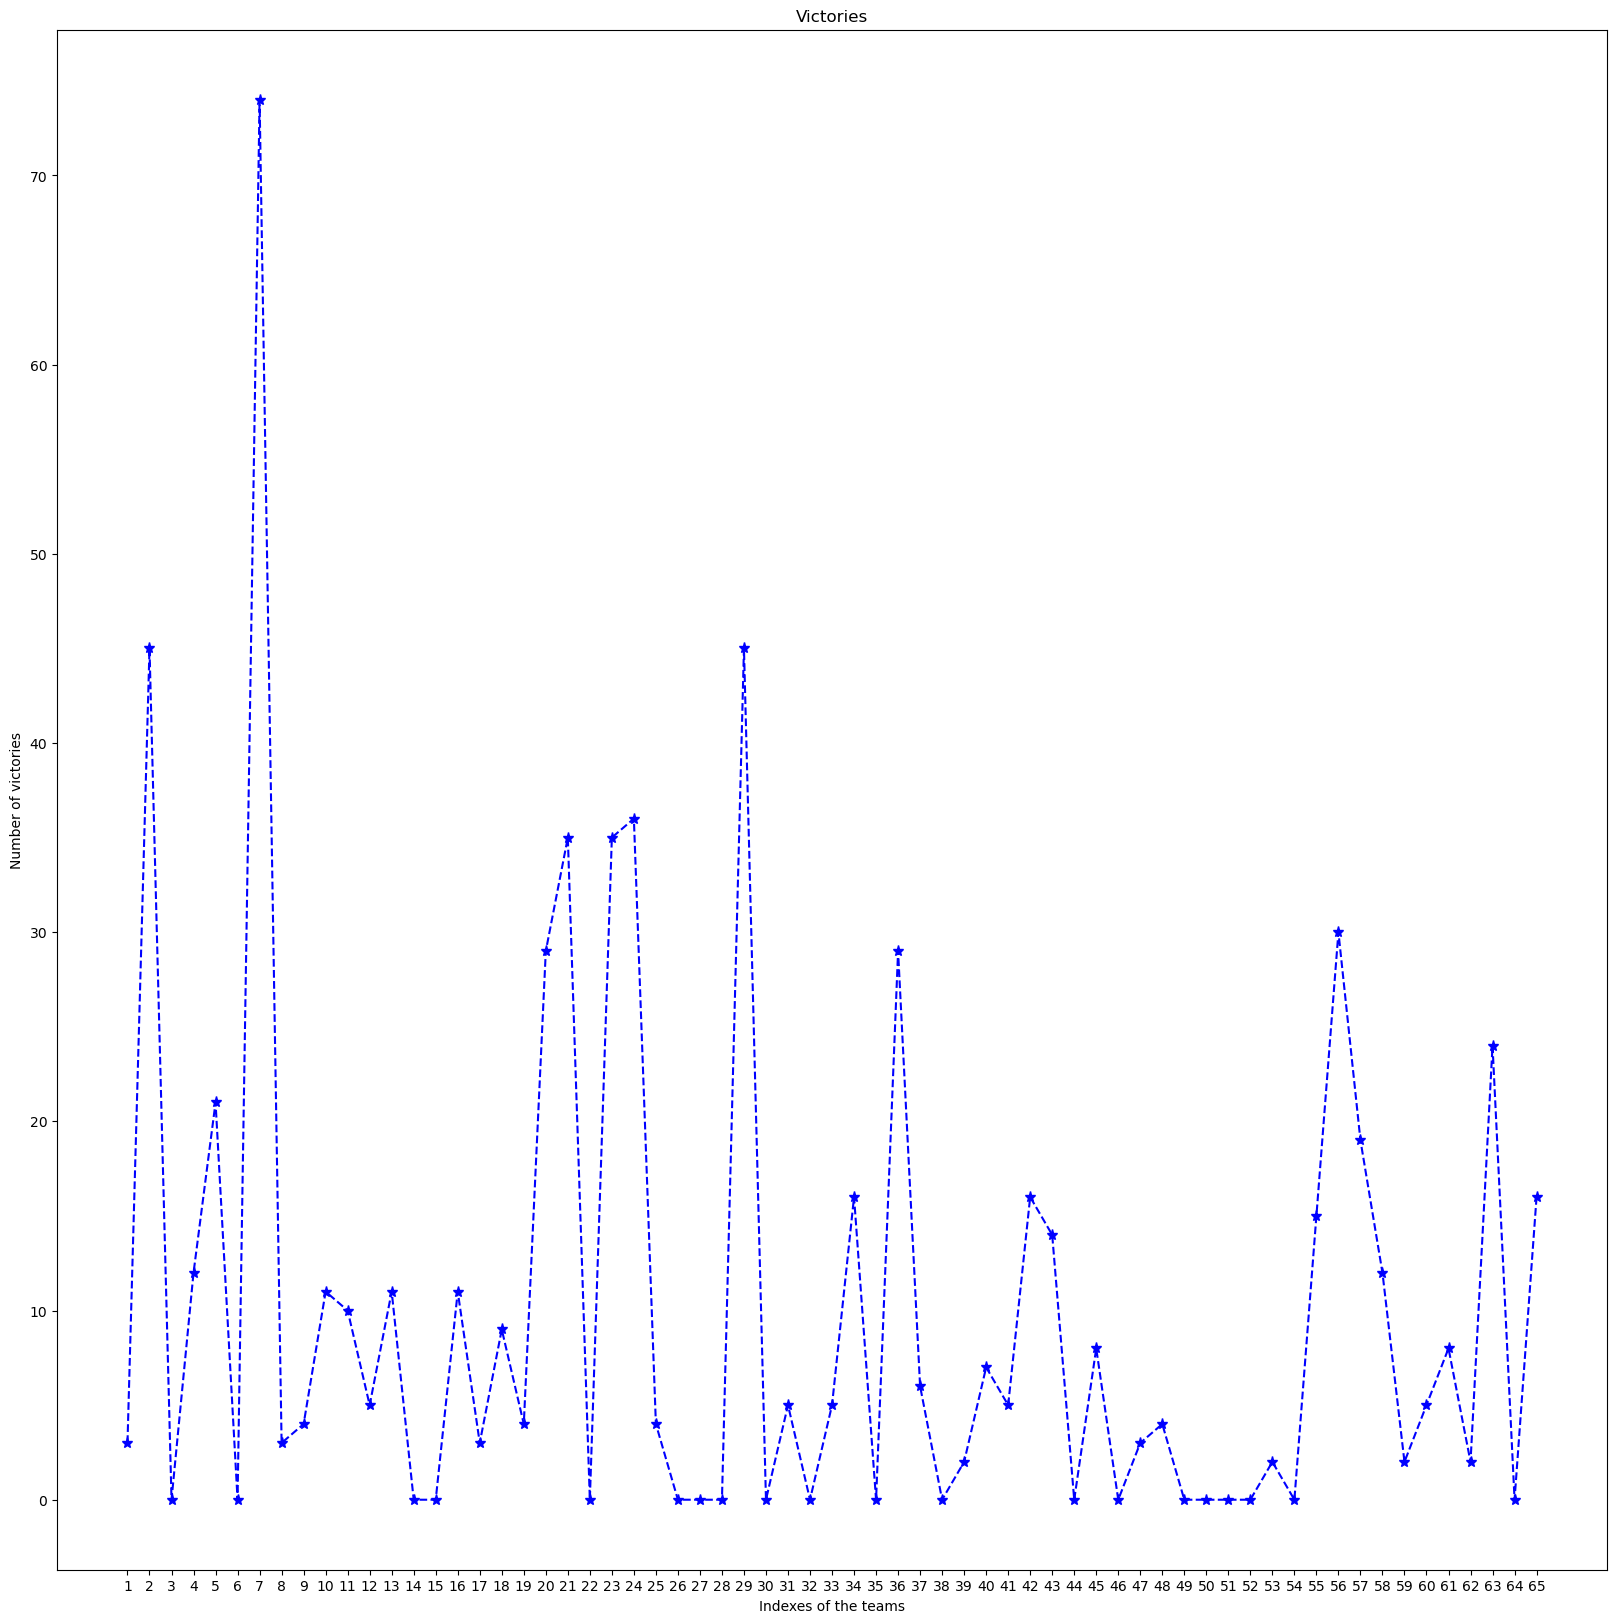

In [118]:
print("According to the following relationship between the number and the teams, we have:")
print(list_aux_vic)
plt.figure(figsize = (20,20))
plt.plot(series_aux_vic.values, vic_team.fillna(0).values, "*--b",  ms = 8)
plt.xticks(np.arange(1, 66, 1))
plt.xlabel("Indexes of the teams")
plt.ylabel("Number of victories")
plt.title("Victories")


Number of losses by team:

According to the following relationship between the number and the teams, we have:
[(1, 'Algeria'), (2, 'Angola'), (3, 'Argentina'), (4, 'Australia'), (5, 'Austria'), (6, 'Belgium'), (7, 'Bolivia'), (8, 'Bosnia and Herzegovina'), (9, 'Brazil'), (10, 'Bulgaria'), (11, 'Cameroon'), (12, 'Canada'), (13, 'Chile'), (14, 'China PR'), (15, 'Colombia'), (16, 'Costa Rica'), (17, 'Croatia'), (18, 'Cuba'), (19, 'Czech Republic'), (20, 'Czechoslovakia'), (21, "C�te d'Ivoire"), (22, 'Denmark'), (23, 'Dutch East Indies'), (24, 'Ecuador'), (25, 'Egypt'), (26, 'El Salvador'), (27, 'England'), (28, 'France'), (29, 'German DR'), (30, 'Germany'), (31, 'Germany FR'), (32, 'Ghana'), (33, 'Greece'), (34, 'Haiti'), (35, 'Honduras'), (36, 'Hungary'), (37, 'IR Iran'), (38, 'Iceland'), (39, 'Iran'), (40, 'Iraq'), (41, 'Israel'), (42, 'Italy'), (43, 'Jamaica'), (44, 'Japan'), (45, 'Korea DPR'), (46, 'Korea Republic'), (47, 'Kuwait'), (48, 'Mexico'), (49, 'Morocco'), (50, 'Netherlands'), (51, 'New Zealand'), (52,

Text(0.5, 1.0, 'Losses')

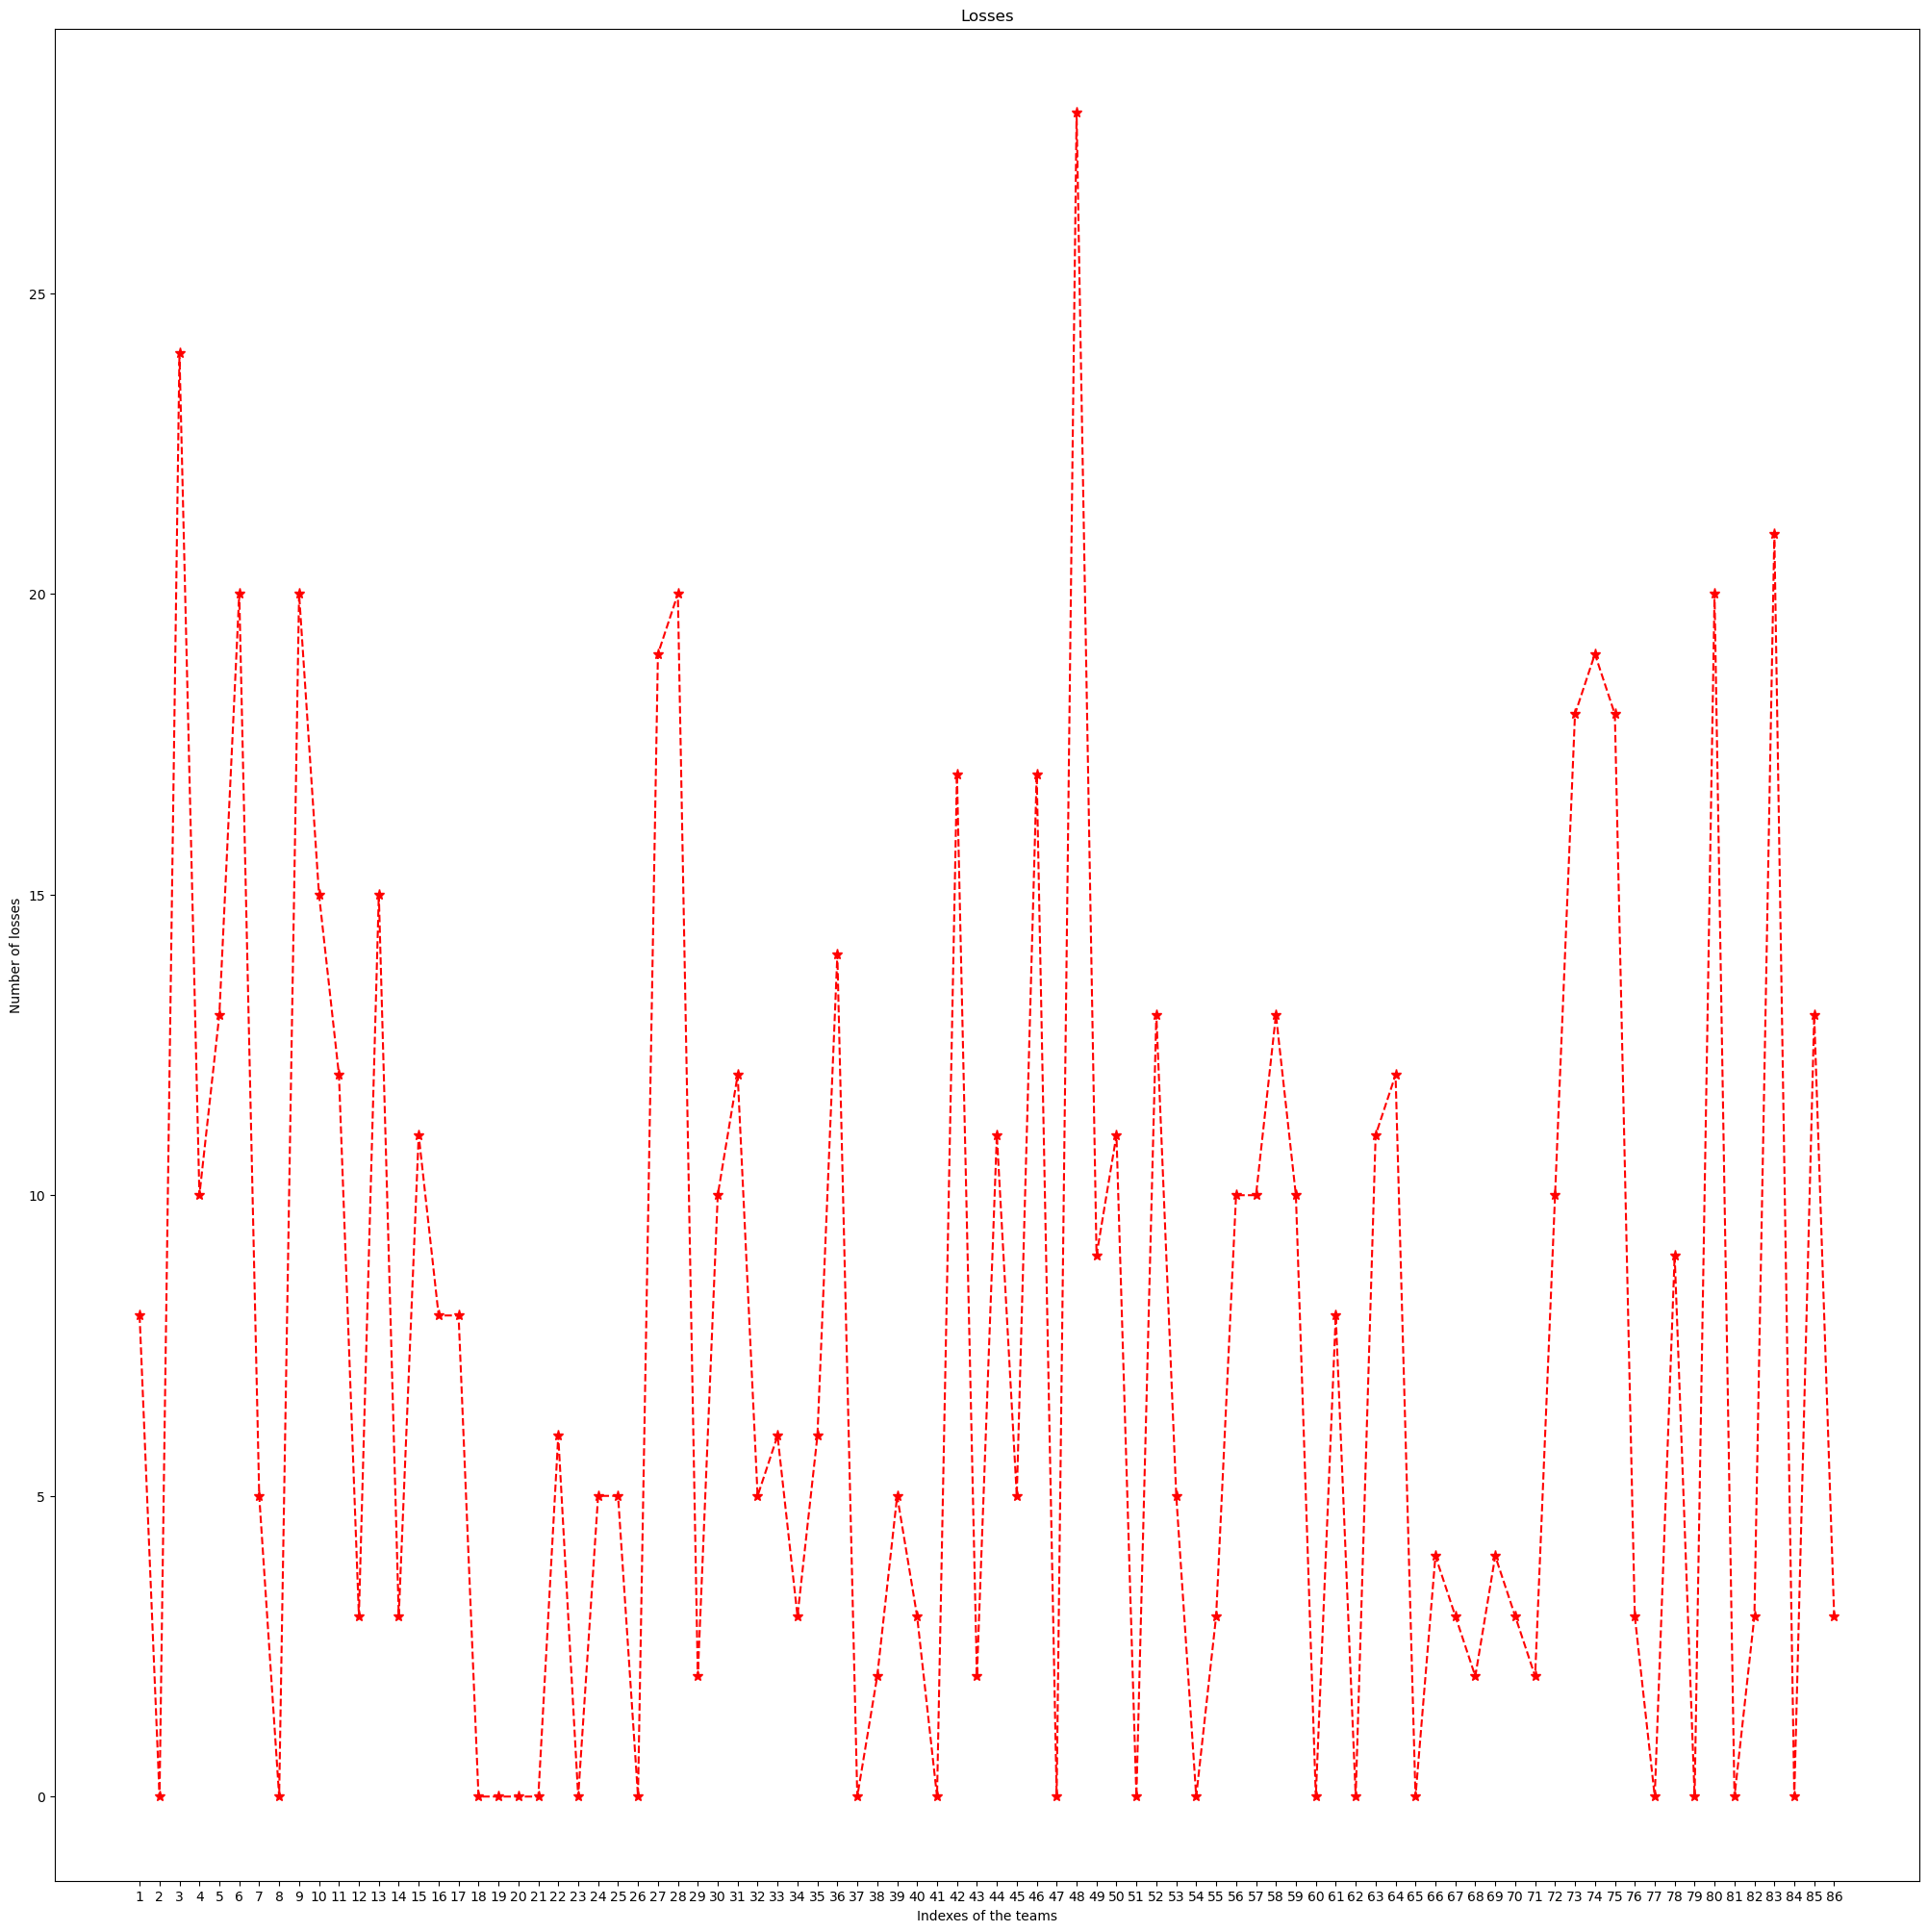

In [119]:
print("According to the following relationship between the number and the teams, we have:")
print(list_aux_loss)
plt.figure(figsize = (25,25))
plt.plot(series_aux_loss.values, loss_team.fillna(0).values, "*--r",  ms = 8)
plt.xticks(np.arange(1, 87, 1))
plt.xlabel("Indexes of the teams")
plt.ylabel("Number of losses")
plt.title("Losses")

Number of games played by each team:

In [120]:
teams = test.games_played()
teams

Algeria                 14.0
Angola                   3.0
Argentina               85.0
Australia               16.0
Austria                 29.0
                        ... 
United Arab Emirates     3.0
Uruguay                 57.0
Wales                    5.0
Yugoslavia              37.0
Zaire                    3.0
Name: count, Length: 86, dtype: float64

In [121]:
series_aux_teams = pd.Series(range(1, 87), teams.index)
series_aux_teams

Algeria                  1
Angola                   2
Argentina                3
Australia                4
Austria                  5
                        ..
United Arab Emirates    82
Uruguay                 83
Wales                   84
Yugoslavia              85
Zaire                   86
Length: 86, dtype: int64

In [122]:
list_aux_teams = list(zip(range(1, 87), teams.index))
list_aux_teams

[(1, 'Algeria'),
 (2, 'Angola'),
 (3, 'Argentina'),
 (4, 'Australia'),
 (5, 'Austria'),
 (6, 'Belgium'),
 (7, 'Bolivia'),
 (8, 'Bosnia and Herzegovina'),
 (9, 'Brazil'),
 (10, 'Bulgaria'),
 (11, 'Cameroon'),
 (12, 'Canada'),
 (13, 'Chile'),
 (14, 'China PR'),
 (15, 'Colombia'),
 (16, 'Costa Rica'),
 (17, 'Croatia'),
 (18, 'Cuba'),
 (19, 'Czech Republic'),
 (20, 'Czechoslovakia'),
 (21, "C�te d'Ivoire"),
 (22, 'Denmark'),
 (23, 'Dutch East Indies'),
 (24, 'Ecuador'),
 (25, 'Egypt'),
 (26, 'El Salvador'),
 (27, 'England'),
 (28, 'France'),
 (29, 'German DR'),
 (30, 'Germany'),
 (31, 'Germany FR'),
 (32, 'Ghana'),
 (33, 'Greece'),
 (34, 'Haiti'),
 (35, 'Honduras'),
 (36, 'Hungary'),
 (37, 'IR Iran'),
 (38, 'Iceland'),
 (39, 'Iran'),
 (40, 'Iraq'),
 (41, 'Israel'),
 (42, 'Italy'),
 (43, 'Jamaica'),
 (44, 'Japan'),
 (45, 'Korea DPR'),
 (46, 'Korea Republic'),
 (47, 'Kuwait'),
 (48, 'Mexico'),
 (49, 'Morocco'),
 (50, 'Netherlands'),
 (51, 'New Zealand'),
 (52, 'Nigeria'),
 (53, 'Northern Ire

According to the following relationship between the number and the teams, we have:


Text(0.5, 1.0, 'Games played by each team')

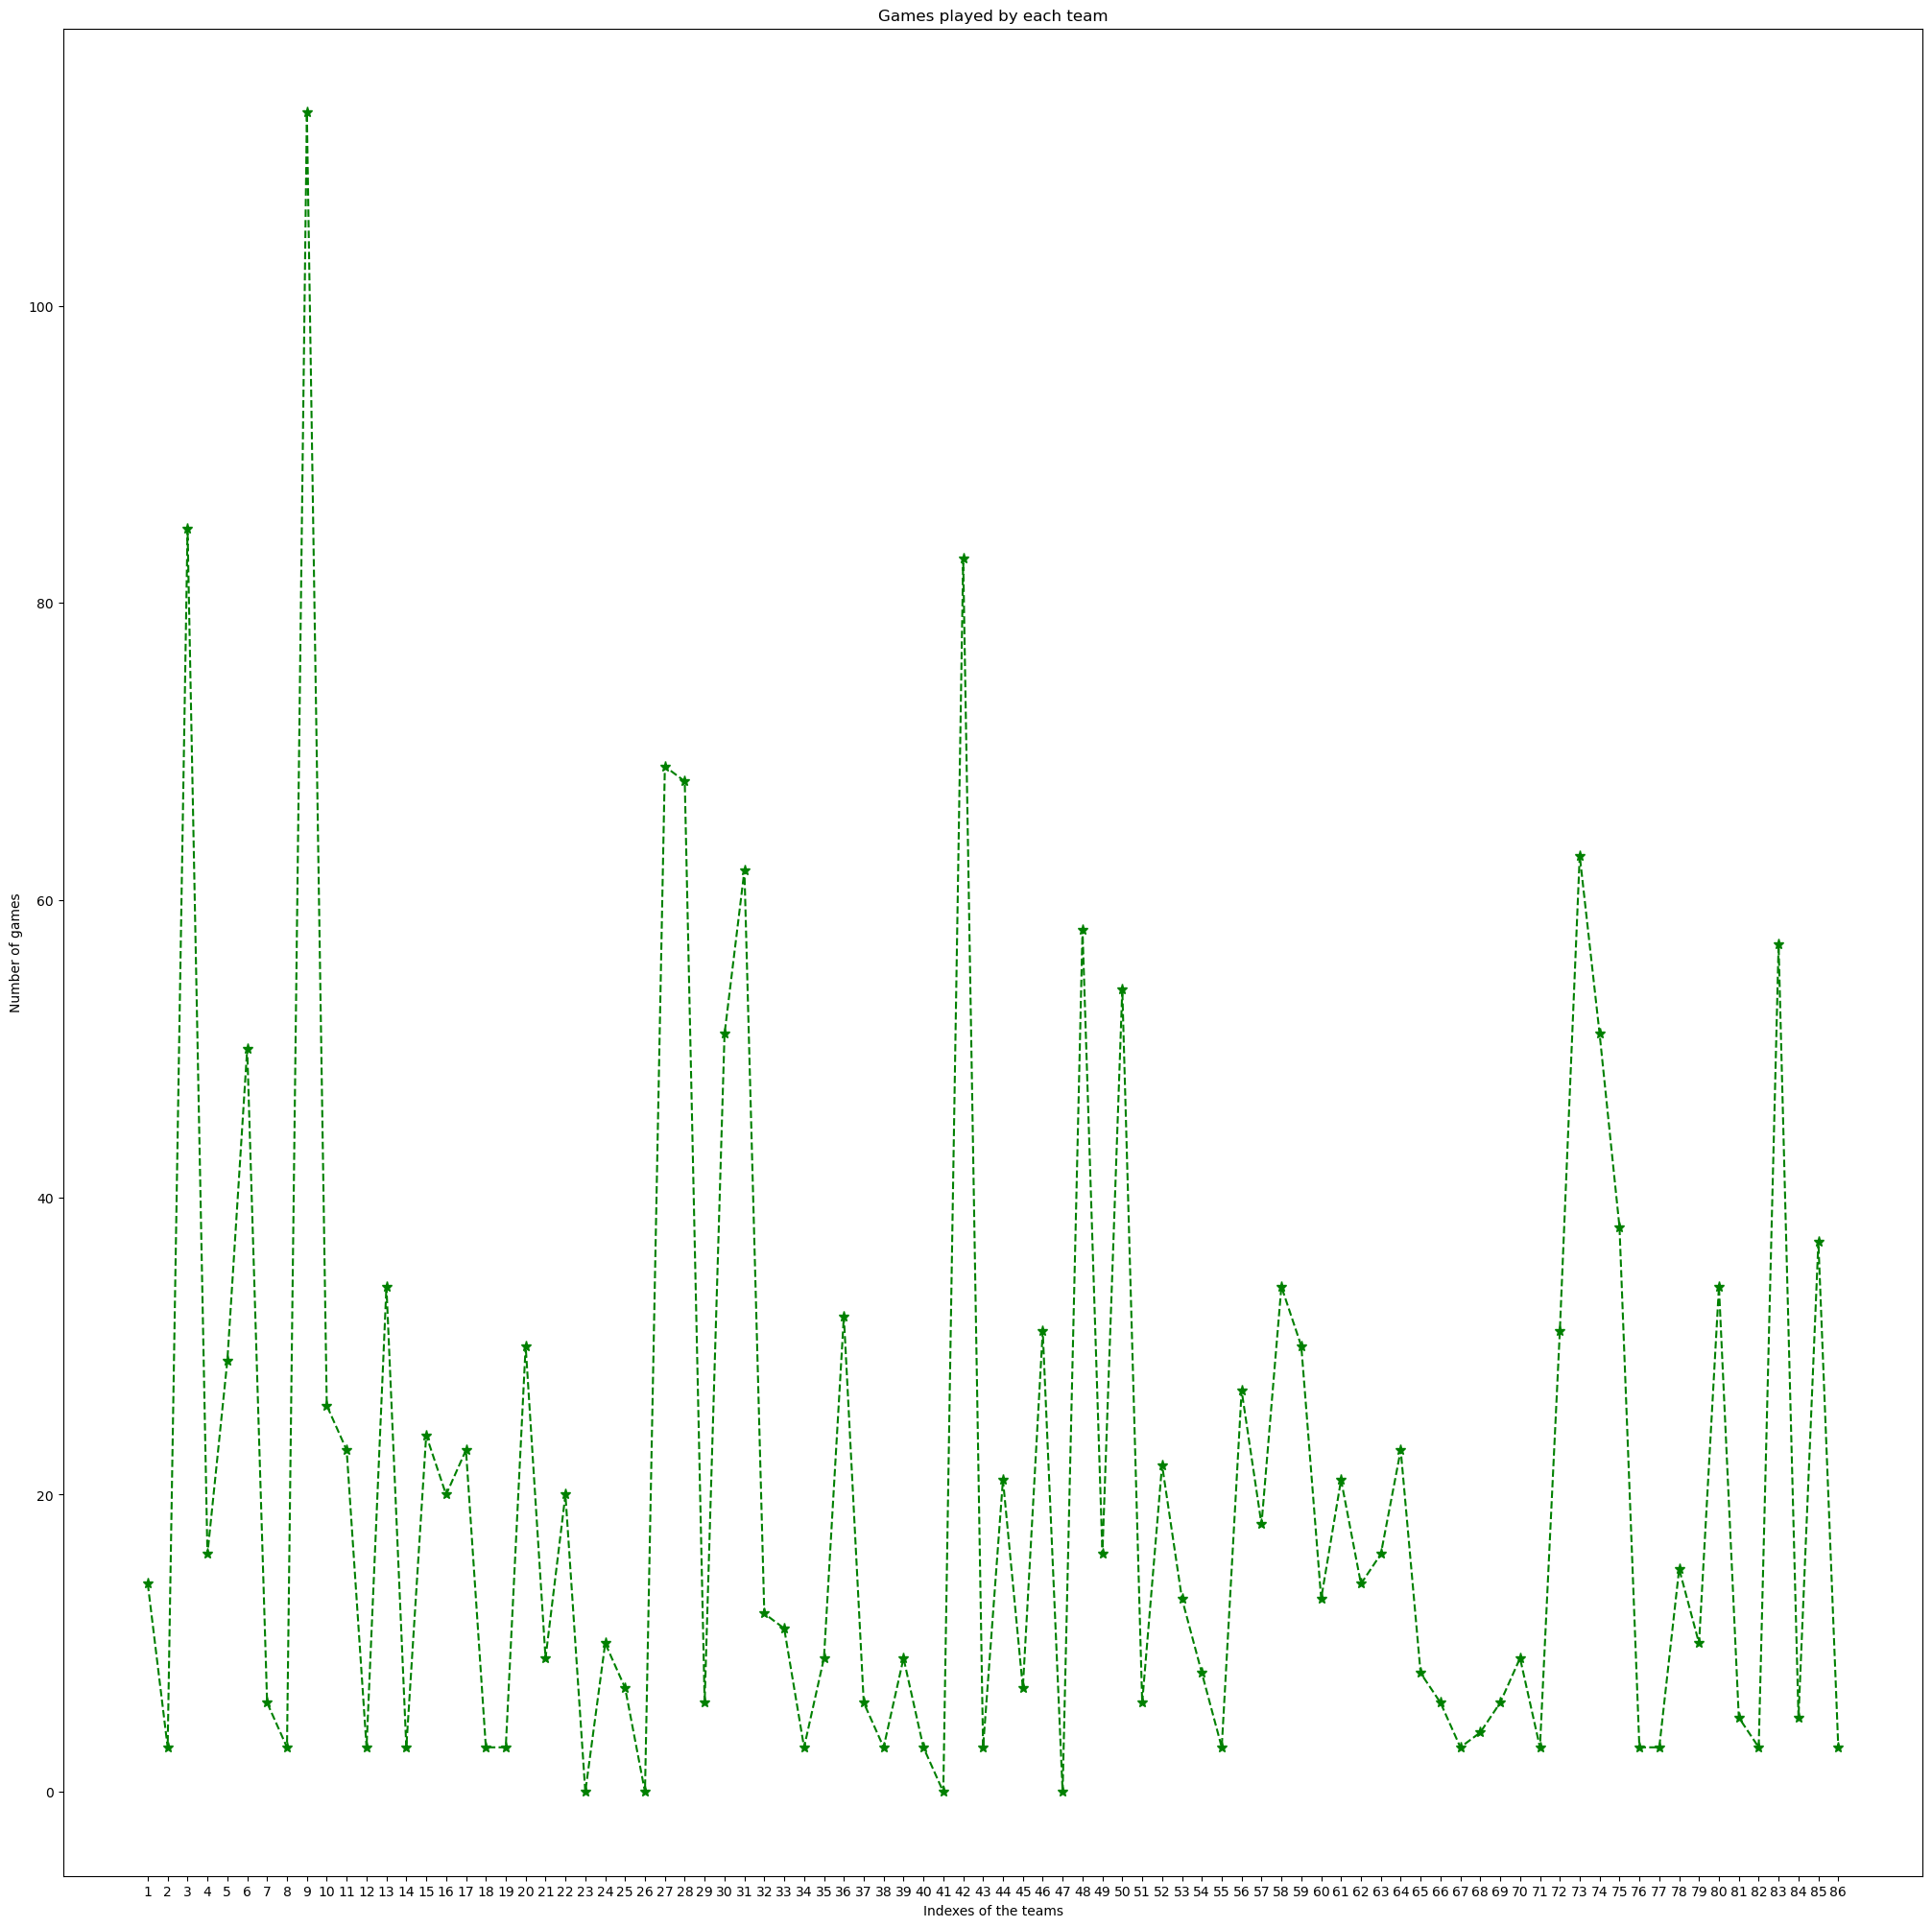

In [123]:
print("According to the following relationship between the number and the teams, we have:")
plt.figure(figsize = (25,25))
plt.plot(series_aux_teams.values, teams.fillna(0).values, "*--g",  ms = 8)
plt.xticks(np.arange(1, 87, 1))
plt.xlabel("Indexes of the teams")
plt.ylabel("Number of games")
plt.title("Games played by each team")

Number of goals in each edition of WC:

In [124]:
df.head()

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away


In [125]:
list_years = df["year"].unique()
list_goals = []

for i in list_years:
    list_goals.append(df[df["year"] == i][["home_team_goals", "away_team_goals"]].values.sum())


Text(0.5, 1.0, 'Number of goals in each edition')

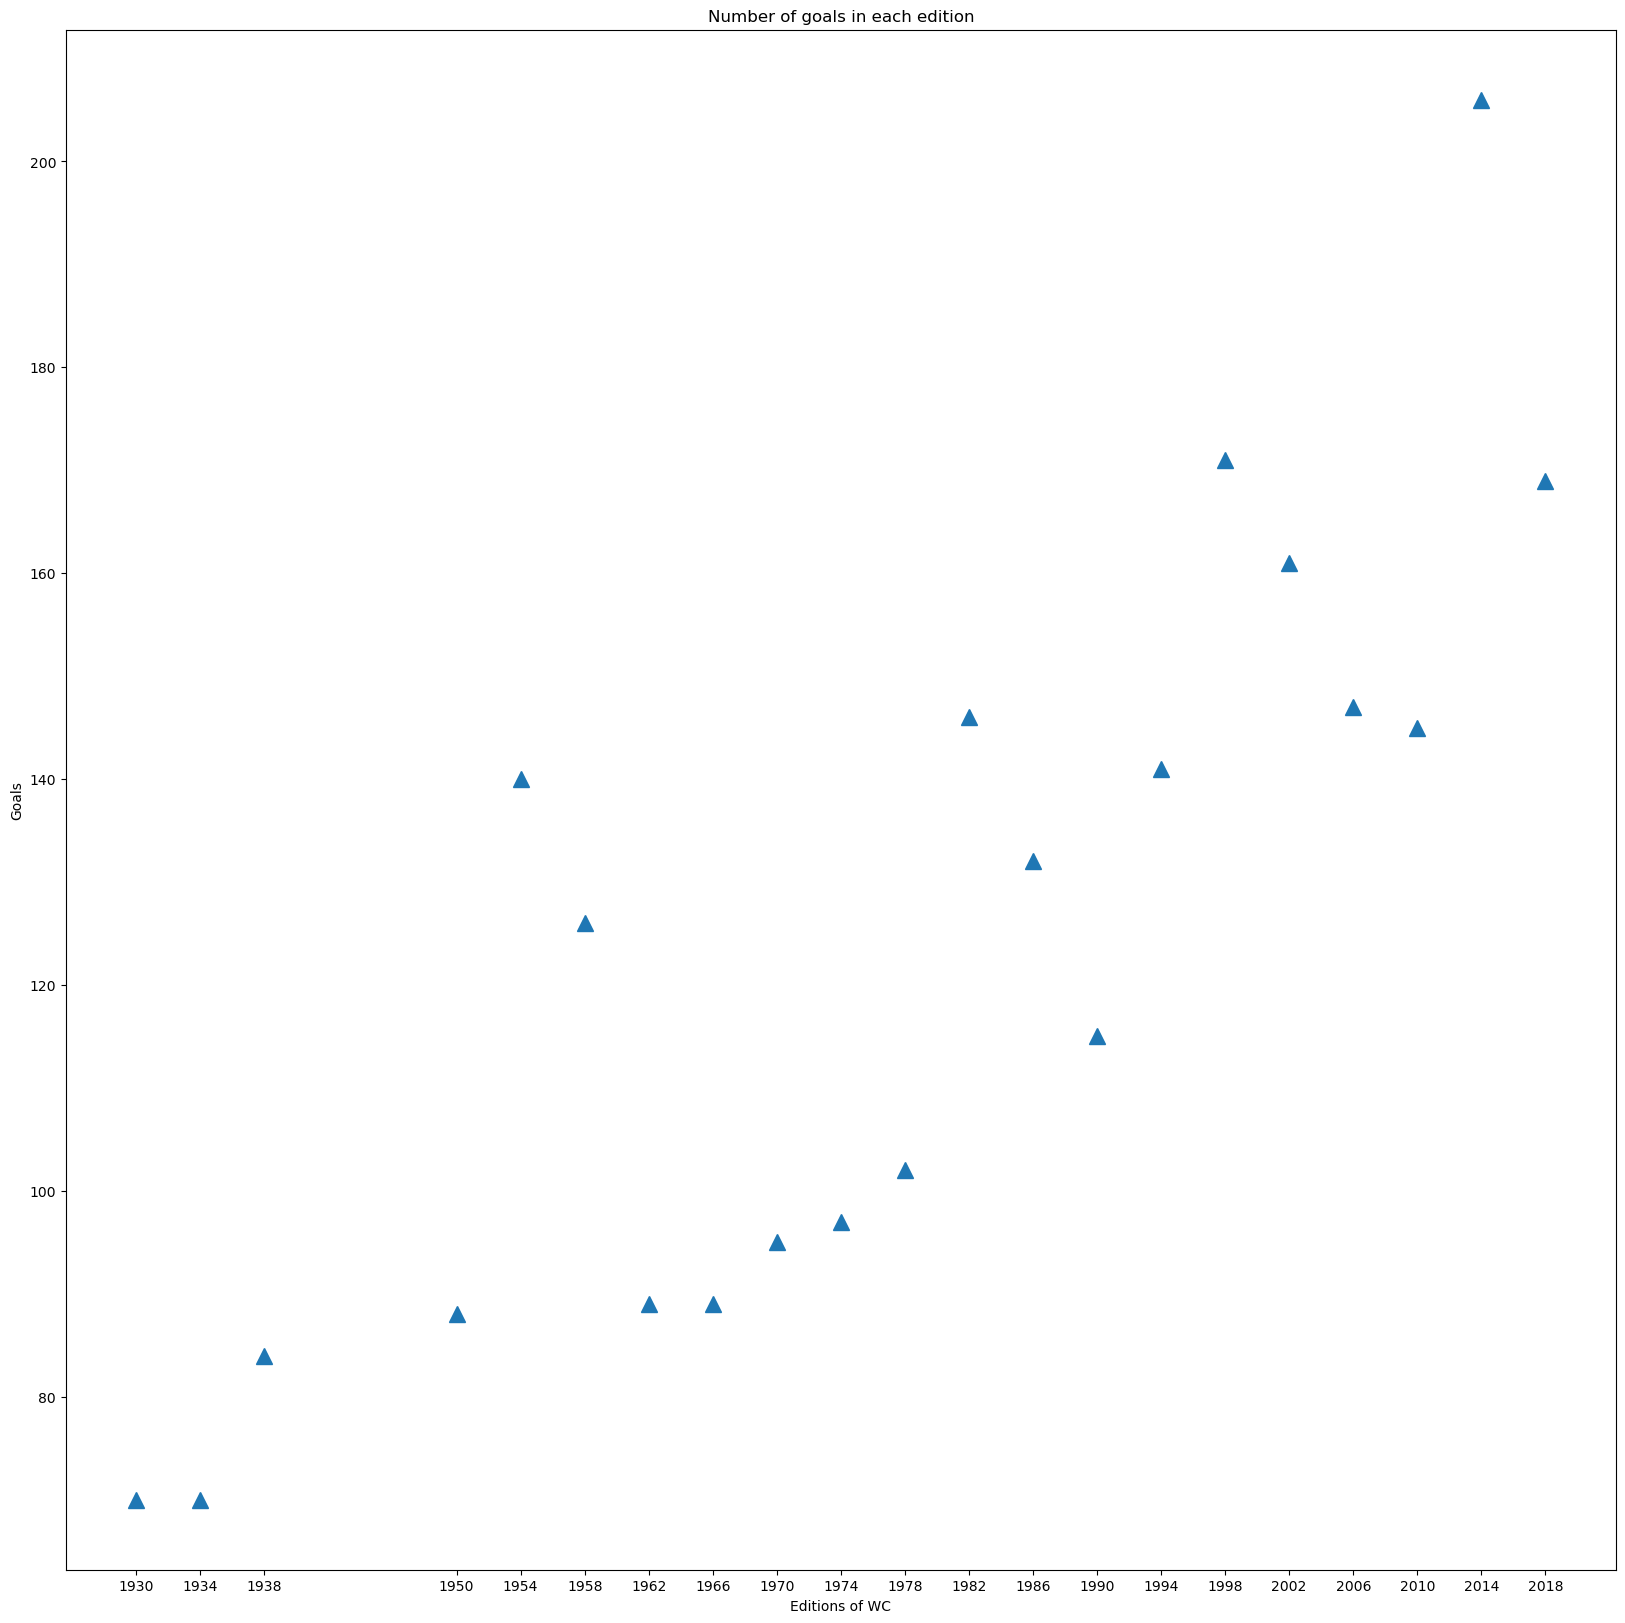

In [126]:
plt.figure(figsize = (20,20))
plt.plot(list_years, list_goals, "^",  ms = 12)
plt.xticks(list_years)
plt.xlabel("Editions of WC")
plt.ylabel("Goals")
plt.title("Number of goals in each edition")

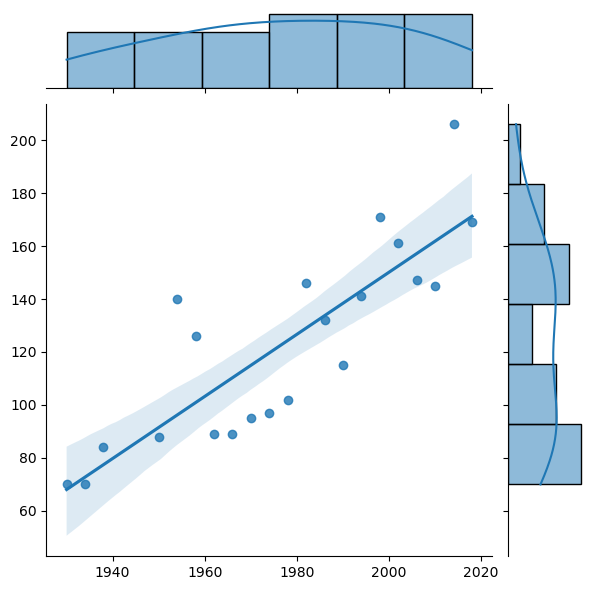

In [127]:
sns.jointplot(x = list_years, y = list_goals, kind = "reg")

Number of trophies by each team:

In [128]:
import pandas as pd

In [129]:
table = pd.read_html("https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA#T%C3%ADtulos")

In [130]:
for i in table:
    print(i.columns)



Index(['Campeonato Mundial de Futebol', 'Campeonato Mundial de Futebol.1'], dtype='object')
Index(['Dados históricos', 'Dados históricos.1'], dtype='object')
Index(['Estatísticas', 'Estatísticas.1'], dtype='object')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Index(['Seleção', 'Títulos', 'Vices', '3º lugar', '4º lugar', 'Top 4'], dtype='object')
Index(['Confederação', 'Títulos', 'Vices', '3º lugar', '4º lugar'], dtype='object')
Index(['Nº', 'Time 1', 'Placar', 'Time 2', 'Estádio', 'Data', 'Ano'], dtype='object')
Index(['País', 'Títulos'], dtype='object')
Index(['Pos.', 'Seleções', 'Pts', 'J', 'V', 'E', 'D', 'GP', 'GC', 'SG'], dtype='object')
Index(['Edição', 'Partidas', 'Público Total', 'Menor público',
       'Menor público.1', 'Menor público.2', 'Maior público',
       'Maior público.1', 'Maior público.2', 'Média de público'],
      dtype='object')
MultiIndex([('Menores públicos',    'Seleção'),
            ('Menores públicos', 'Quantidade'),
            ('Maiores públicos',

In [131]:
table_info = table[4]
table_info = table_info[0:8]
table_info

,Seleção,Títulos,Vices,3º lugar,4º lugar,Top 4
0,Brasil,"5 (1958, 1962, 1970, 1994 e 2002)",2 (1950 e 1998),2 (1938 e 1978),2 (1974 e 2014),11
1,Alemanha[nota 4],"4 (1954, 1974, 1990 e 2014)","4 (1966, 1982, 1986 e 2002)","4 (1934, 1970, 2006 e 2010)",1 (1958),13
2,Itália,"4 (1934, 1938, 1982 e 2006)",2 (1970 e 1994),1 (1990),1 (1978),8
3,Argentina,"3 (1978, 1986 e 2022)","3 (1930, 1990 e 2014)",–,–,6
4,França,2 (1998 e 2018),2 (2006 e 2022),2 (1958 e 1986),1 (1982),7
5,Uruguai,2 (1930 e 1950),–,–,"3 (1954, 1970 e 2010)",5
6,Inglaterra,1 (1966),–,–,2 (1990 e 2018),3
7,Espanha,1 (2010),–,–,1 (1950),2


In [132]:
winners = ["Spain", "England", "Uruguay", "France", "Argentina", "Italy", "Germany", "Brazil"]

In [133]:
titles = [1, 1, 2, 2, 2, 4, 4, 5]

In [134]:
games_p_team = test.games_played()
games_p_team[winners]

Spain         63.0
England       69.0
Uruguay       57.0
France        68.0
Argentina     85.0
Italy         83.0
Germany       51.0
Brazil       113.0
Name: count, dtype: float64

Text(0, 0.5, 'Titles')

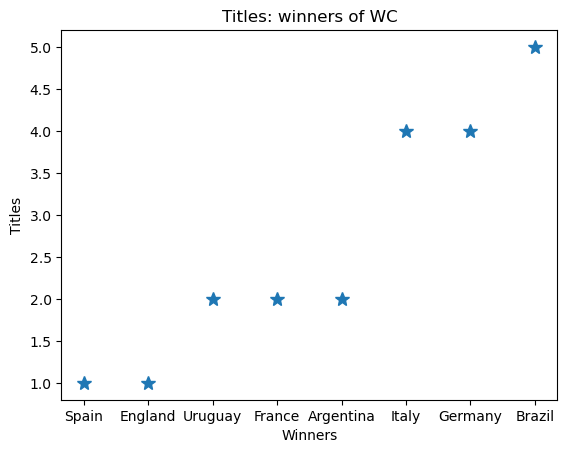

In [135]:
plt.plot(winners, titles, "*", ms = 10)
plt.title("Titles: winners of WC")
plt.xlabel("Winners")
plt.ylabel("Titles")

### Detecting outliers:

In [136]:
df

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away
...,...,...,...,...,...,...,...
911,2018,Uruguay,0.0,2.0,France,away,home
912,2018,Croatia,2.0,1.0,England,home,away
913,2018,France,1.0,0.0,Belgium,home,away
914,2018,Belgium,2.0,0.0,England,home,away


In [137]:
import data_vis_und
import numpy as np

In [138]:
a = data_vis_und.Numerical_based(["home_team_goals", "away_team_goals"])

In [139]:
a.goals_per_game_stat()

Total number of goals in all matches at WC history: 2583.0
Mean of goals per game: 2.819868995633188
Standard Deviation of goals per game: 1.9292277298164873
Variance of goals per game: 3.7219196334928775
Maximum number of goals per game: 12.0


In [140]:
goals_per_game = list(df[a.dataframe_numerical].sum(axis = 1))
goals_per_game = np.array(goals_per_game)
goals_per_game

array([ 5.,  3.,  3.,  4.,  1.,  3.,  4.,  3.,  1.,  1.,  9.,  4.,  1.,
        4.,  4.,  7.,  7.,  6.,  5.,  6.,  5.,  5.,  7.,  4.,  8.,  3.,
        5.,  3.,  2.,  3.,  1.,  1.,  4.,  5.,  3.,  2.,  6.,  4.,  6.,
        3., 11.,  3.,  3.,  6.,  2.,  2.,  8.,  4.,  3.,  6.,  3.,  6.,
        6.,  4.,  2.,  4.,  5.,  3.,  4.,  5.,  2.,  4.,  1.,  2.,  1.,
        2.,  8.,  3.,  7.,  4.,  8.,  7.,  5.,  4.,  3.,  2.,  1.,  5.,
        1.,  5.,  9.,  8.,  3.,  7.,  5.,  5.,  2., 11.,  7.,  2.,  5.,
        9.,  5.,  6., 12.,  2.,  6.,  7.,  6.,  4.,  5.,  3.,  4.,  4.,
        2., 10.,  2.,  3.,  1.,  0.,  2.,  5.,  5.,  2.,  4.,  4.,  3.,
        0.,  2.,  4.,  4.,  6.,  3.,  4.,  7.,  1.,  3.,  3.,  1.,  1.,
        2.,  4.,  4.,  7.,  9.,  7.,  3.,  2.,  1.,  4.,  2.,  1.,  3.,
        0.,  4.,  0.,  4.,  2.,  8.,  1.,  7.,  3.,  3.,  3.,  0.,  2.,
        5.,  4.,  0.,  3.,  3.,  4.,  1.,  1.,  4.,  6.,  1.,  4.,  0.,
        5.,  2.,  3.,  2.,  4.,  3.,  2.,  3.,  3.,  4.,  2.,  3

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'World Cup History')

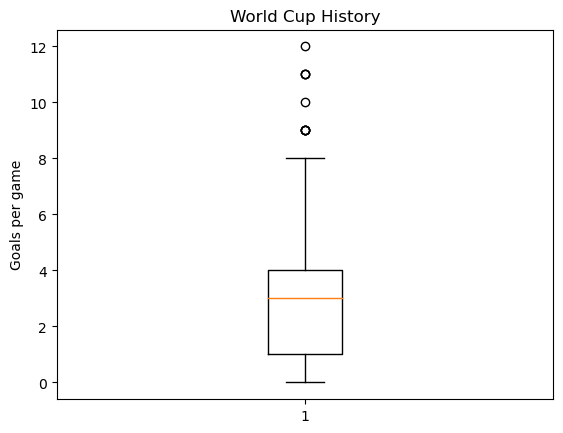

In [142]:
plt.boxplot(goals_per_game)
plt.ylabel("Goals per game")
plt.title("World Cup History")

Detecting outliers:

In [143]:
condition = (goals_per_game < goals_per_game.mean() - 3*goals_per_game.std()) | (goals_per_game > goals_per_game.mean() + 3*goals_per_game.std()) 

In [144]:
np.where(goals_per_game == 9)

(array([ 10,  80,  91, 134, 243]),)

In [145]:
goals_per_game_set = set(goals_per_game[condition])
goals_per_game_set

{9.0, 10.0, 11.0, 12.0}

In [146]:
list_indexes = []

for i in goals_per_game_set:
    list_indexes.append(np.where(goals_per_game == i))
    
list_indexes

[(array([ 10,  80,  91, 134, 243]),),
 (array([105]),),
 (array([ 40,  87, 312]),),
 (array([94]),)]

In [147]:
cont_index = []

for i in list_indexes:
    for j in i:
        for k in j:
             cont_index.append(k)
                
cont_index

[10, 80, 91, 134, 243, 105, 40, 87, 312, 94]

In [148]:
goals_per_game = np.delete(goals_per_game, cont_index)

In [149]:
condition = (goals_per_game < goals_per_game.mean() - 3*goals_per_game.std()) | (goals_per_game > goals_per_game.mean() + 3*goals_per_game.std()) 

In [150]:
goals_per_game[condition]

array([], dtype=float64)

Text(0.5, 1.0, 'World Cup History')

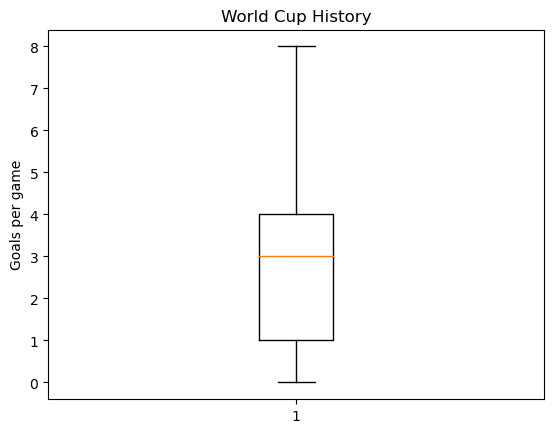

In [151]:
plt.boxplot(goals_per_game)
plt.ylabel("Goals per game")
plt.title("World Cup History")

9 to 12 are vey rare values, that is, they are outliers

In [152]:
b = data_vis_und.NonNumerical_based()

In [153]:
games_played_per_team = b.games_played().fillna(0).values
games_played_per_team

array([ 14.,   3.,  85.,  16.,  29.,  50.,   6.,   3., 113.,  26.,  23.,
         3.,  34.,   3.,  24.,  20.,  23.,   3.,   3.,  30.,   9.,  20.,
         0.,  10.,   7.,   0.,  69.,  68.,   6.,  51.,  62.,  12.,  11.,
         3.,   9.,  32.,   6.,   3.,   9.,   3.,   0.,  83.,   3.,  21.,
         7.,  31.,   0.,  58.,  16.,  54.,   6.,  22.,  13.,   8.,   3.,
        27.,  18.,  34.,  30.,  13.,  21.,  14.,  16.,  23.,   8.,   6.,
         3.,   4.,   6.,   9.,   3.,  31.,  63.,  51.,  38.,   3.,   3.,
        15.,  10.,  34.,   5.,   3.,  57.,   5.,  37.,   3.])

Text(0.5, 1.0, 'World Cup History')

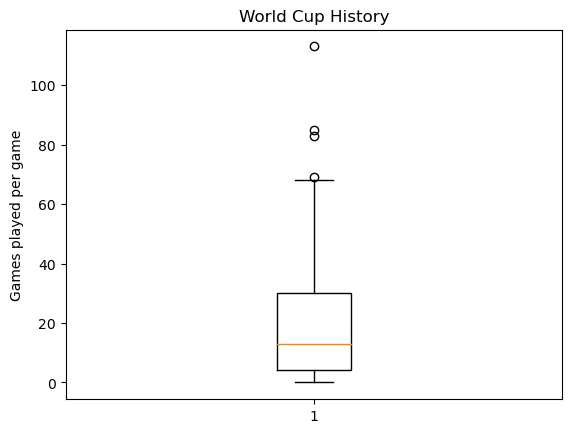

In [154]:
plt.boxplot(games_played_per_team)
plt.ylabel("Games played per game")
plt.title("World Cup History")

In [155]:
condition = (games_played_per_team < games_played_per_team.mean() - 3*games_played_per_team.std()) | (games_played_per_team > games_played_per_team.mean() + 3*games_played_per_team.std())

In [156]:
games_played_per_team_set = set(games_played_per_team[condition])
games_played_per_team_set

{113.0}

In [157]:
list_indexes = []

for i in games_played_per_team_set:
    list_indexes.append(np.where(games_played_per_team == i))
    
list_indexes

[(array([8]),)]

In [158]:
cont_index = []

for i in list_indexes:
    for j in i:
        for k in j:
             cont_index.append(k)
                
cont_index

[8]

In [159]:
games_played_per_team = np.delete(games_played_per_team, cont_index)

Text(0.5, 1.0, 'World Cup History')

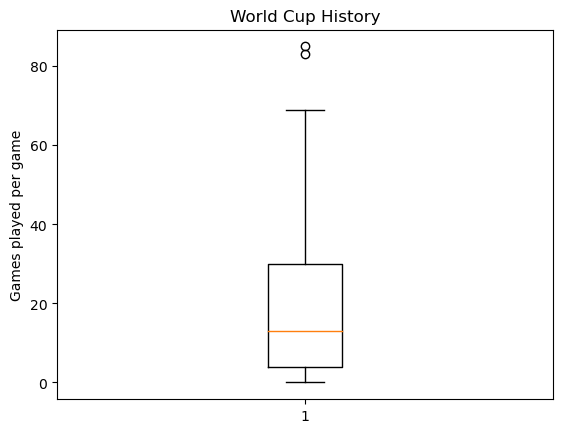

In [160]:
plt.boxplot(games_played_per_team)
plt.ylabel("Games played per game")
plt.title("World Cup History")

In [161]:
victories_per_team_aux = b.victories_per_team().fillna(0).values
victories_per_team_aux

array([ 3., 45.,  0., 12., 21.,  0., 74.,  3.,  4., 11., 10.,  5., 11.,
        0.,  0., 11.,  3.,  9.,  4., 29., 35.,  0., 35., 36.,  4.,  0.,
        0.,  0., 45.,  0.,  5.,  0.,  5., 16.,  0., 29.,  6.,  0.,  2.,
        7.,  5., 16., 14.,  0.,  8.,  0.,  3.,  4.,  0.,  0.,  0.,  0.,
        2.,  0., 15., 30., 19., 12.,  2.,  5.,  8.,  2., 24.,  0., 16.])

In [162]:
losses_per_team_aux = b.losses_per_team().fillna(0).values
losses_per_team_aux

array([ 8.,  0., 24., 10., 13., 20.,  5.,  0., 20., 15., 12.,  3., 15.,
        3., 11.,  8.,  8.,  0.,  0.,  0.,  0.,  6.,  0.,  5.,  5.,  0.,
       19., 20.,  2., 10., 12.,  5.,  6.,  3.,  6., 14.,  0.,  2.,  5.,
        3.,  0., 17.,  2., 11.,  5., 17.,  0., 28.,  9., 11.,  0., 13.,
        5.,  0.,  3., 10., 10., 13., 10.,  0.,  8.,  0., 11., 12.,  0.,
        4.,  3.,  2.,  4.,  3.,  2., 10., 18., 19., 18.,  3.,  0.,  9.,
        0., 20.,  0.,  3., 21.,  0., 13.,  3.])

In [163]:
goals_per_team_aux = []

for i in range(86):
    goals_per_team_aux.append(b.goals_per_team()[i][1])
    
goals_per_team_aux = np.array(goals_per_team_aux)
goals_per_team_aux

array([  3.,  99.,   1.,  80.,   1.,   0.,   1.,  42.,   4.,  55.,  11.,
         5.,   0.,  71.,  73.,  24.,   8.,   0.,  40.,   4.,  51.,  22.,
        68.,   0.,  13.,   3.,   0.,  10.,  60.,   3., 186.,   1.,  31.,
         0.,   7.,   1.,   7.,   5.,   3.,  19.,   0.,  11.,   3., 112.,
         7.,   1.,   5.,   3.,  53.,   0.,   5.,   0.,   2.,   0.,  14.,
         0.,  27.,  18.,  15.,   0.,   2.,   2.,   1.,   3.,   5.,  11.,
         2.,  28.,  43.,   1.,   0.,  19.,   0.,   9.,  25.,   2.,  15.,
        40.,   0.,  13.,  14.,  99.,   1.,   0.,   4.,   7.])

Repeat this pipeline for: victories_per_team, losses_per_team and goals_per_team.

### Scaling the values from these methods:

In [164]:
# Goals_per_game
goals_per_game = (goals_per_game - goals_per_game.min())/(goals_per_game.max() - goals_per_game.min())
goals_per_game

array([0.625, 0.375, 0.375, 0.5  , 0.125, 0.375, 0.5  , 0.375, 0.125,
       0.125, 0.5  , 0.125, 0.5  , 0.5  , 0.875, 0.875, 0.75 , 0.625,
       0.75 , 0.625, 0.625, 0.875, 0.5  , 1.   , 0.375, 0.625, 0.375,
       0.25 , 0.375, 0.125, 0.125, 0.5  , 0.625, 0.375, 0.25 , 0.75 ,
       0.5  , 0.75 , 0.375, 0.375, 0.375, 0.75 , 0.25 , 0.25 , 1.   ,
       0.5  , 0.375, 0.75 , 0.375, 0.75 , 0.75 , 0.5  , 0.25 , 0.5  ,
       0.625, 0.375, 0.5  , 0.625, 0.25 , 0.5  , 0.125, 0.25 , 0.125,
       0.25 , 1.   , 0.375, 0.875, 0.5  , 1.   , 0.875, 0.625, 0.5  ,
       0.375, 0.25 , 0.125, 0.625, 0.125, 0.625, 1.   , 0.375, 0.875,
       0.625, 0.625, 0.25 , 0.875, 0.25 , 0.625, 0.625, 0.75 , 0.25 ,
       0.75 , 0.875, 0.75 , 0.5  , 0.625, 0.375, 0.5  , 0.5  , 0.25 ,
       0.25 , 0.375, 0.125, 0.   , 0.25 , 0.625, 0.625, 0.25 , 0.5  ,
       0.5  , 0.375, 0.   , 0.25 , 0.5  , 0.5  , 0.75 , 0.375, 0.5  ,
       0.875, 0.125, 0.375, 0.375, 0.125, 0.125, 0.25 , 0.5  , 0.5  ,
       0.875, 0.875,

In [165]:
#Games played per team
games_played_per_team = (games_played_per_team - games_played_per_team.min())/(games_played_per_team.max() - games_played_per_team.min())
games_played_per_team

array([0.16470588, 0.03529412, 1.        , 0.18823529, 0.34117647,
       0.58823529, 0.07058824, 0.03529412, 0.30588235, 0.27058824,
       0.03529412, 0.4       , 0.03529412, 0.28235294, 0.23529412,
       0.27058824, 0.03529412, 0.03529412, 0.35294118, 0.10588235,
       0.23529412, 0.        , 0.11764706, 0.08235294, 0.        ,
       0.81176471, 0.8       , 0.07058824, 0.6       , 0.72941176,
       0.14117647, 0.12941176, 0.03529412, 0.10588235, 0.37647059,
       0.07058824, 0.03529412, 0.10588235, 0.03529412, 0.        ,
       0.97647059, 0.03529412, 0.24705882, 0.08235294, 0.36470588,
       0.        , 0.68235294, 0.18823529, 0.63529412, 0.07058824,
       0.25882353, 0.15294118, 0.09411765, 0.03529412, 0.31764706,
       0.21176471, 0.4       , 0.35294118, 0.15294118, 0.24705882,
       0.16470588, 0.18823529, 0.27058824, 0.09411765, 0.07058824,
       0.03529412, 0.04705882, 0.07058824, 0.10588235, 0.03529412,
       0.36470588, 0.74117647, 0.6       , 0.44705882, 0.03529

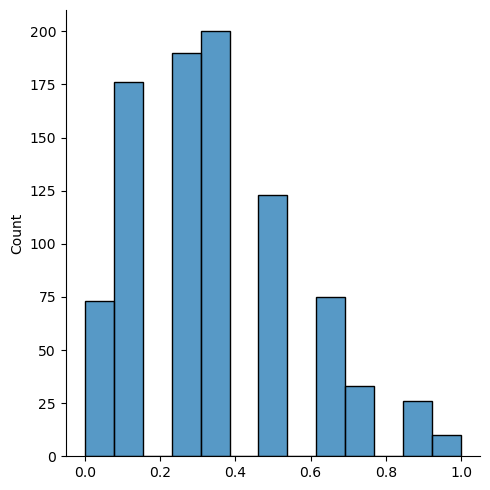

In [166]:
sns.displot(goals_per_game, kind = "hist")

Repeat this pipeline for: victories_per_team, losses_per_team and goals_per_team.

### Discretization:

In [167]:
def value_disc(x):
    if x < 0.33:
        return "low"
    elif 0.33 <= x < 0.67:
        return "medium"
    else:
        return "high"

In [168]:
list_values_disc = []

for i in goals_per_game:
    list_values_disc.append(value_disc(i))
    
list_values_disc

['medium',
 'medium',
 'medium',
 'medium',
 'low',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'low',
 'medium',
 'medium',
 'high',
 'high',
 'high',
 'medium',
 'high',
 'medium',
 'medium',
 'high',
 'medium',
 'high',
 'medium',
 'medium',
 'medium',
 'low',
 'medium',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'low',
 'high',
 'medium',
 'high',
 'medium',
 'medium',
 'medium',
 'high',
 'low',
 'low',
 'high',
 'medium',
 'medium',
 'high',
 'medium',
 'high',
 'high',
 'medium',
 'low',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'medium',
 'low',
 'low',
 'low',
 'low',
 'high',
 'medium',
 'high',
 'medium',
 'high',
 'high',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'low',
 'medium',
 'high',
 'medium',
 'high',
 'medium',
 'medium',
 'low',
 'high',
 'low',
 'medium',
 'medium',
 'high',
 'low',
 'high',
 'high',
 'high',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'low',
 

In [169]:
import pandas as pd

In [170]:
series = pd.Series(list_values_disc, index = goals_per_game)
series

0.625    medium
0.375    medium
0.375    medium
0.500    medium
0.125       low
          ...  
0.250       low
0.375    medium
0.125       low
0.250       low
0.750      high
Length: 906, dtype: object

Apply this to the other methods.

### Pivot Tables

In [171]:
df

,year,home_team_names,home_team_goals,away_team_goals,away_team_names,victory,loss
0,1930,France,4.0,1.0,Mexico,home,away
1,1930,USA,3.0,0.0,Belgium,home,away
2,1930,Yugoslavia,2.0,1.0,Brazil,home,away
3,1930,Romania,3.0,1.0,Peru,home,away
4,1930,Argentina,1.0,0.0,France,home,away
...,...,...,...,...,...,...,...
911,2018,Uruguay,0.0,2.0,France,away,home
912,2018,Croatia,2.0,1.0,England,home,away
913,2018,France,1.0,0.0,Belgium,home,away
914,2018,Belgium,2.0,0.0,England,home,away


In [173]:
df_pivot = df.pivot_table(values = ["home_team_goals", "away_team_goals"], index = ["year", "home_team_names", "away_team_names"])

In [177]:
df_pivot.loc[1930]

away_team_goals  home_team_goals
home_team_names away_team_names                                  
Argentina       Chile                        1.0              3.0
                France                       0.0              1.0
                Mexico                       3.0              6.0
                USA                          1.0              6.0
Brazil          Bolivia                      0.0              4.0
Chile           France                       0.0              1.0
                Mexico                       0.0              3.0
France          Mexico                       1.0              4.0
Paraguay        Belgium                      0.0              1.0
Romania         Peru                         1.0              3.0
USA             Belgium                      0.0              3.0
                Paraguay                     0.0              3.0
Uruguay         Argentina                    2.0              4.0
                Peru                         0.0              1.0
                Romania                      0.0              4.0
                Yugoslavia                   1.0              6.0
Yugoslavia      Bolivia                      0.0              4.0
                Brazil                       1.0              2.0

In [178]:
df_pivot.sort_values(by = "home_team_goals", ascending = False)

,,,away_team_goals,home_team_goals
year,home_team_names,away_team_names,,
1982,Hungary,El Salvador,1.0,10.0
1974,Yugoslavia,Zaire,0.0,9.0
1954,Hungary,Korea Republic,0.0,9.0
1938,Sweden,Cuba,0.0,8.0
1954,Hungary,Germany FR,3.0,8.0
...,...,...,...,...
2010,Portugal,Brazil,0.0,0.0
1982,Honduras,Yugoslavia,1.0,0.0
2010,Serbia,Ghana,1.0,0.0


In [179]:
df_pivot.sort_values(by = "away_team_goals", ascending = False)

away_team_goals  home_team_goals
year home_team_names away_team_names                                  
2014 Brazil          Germany                      7.0              1.0
1974 Haiti           Poland                       7.0              0.0
2014 Spain           Netherlands                  5.0              1.0
1938 Brazil          Poland                       5.0              6.0
2002 Costa Rica      Brazil                       5.0              2.0
...                                               ...              ...
1978 Argentina       Brazil                       0.0              0.0
2002 Korea Republic  Poland                       0.0              2.0
     Japan           Russia                       0.0              1.0
     Italy           Ecuador                      0.0              2.0
2018 Uruguay         Saudi Arabia                 0.0              1.0

[890 rows x 2 columns]

In [180]:
df_pivot.sort_values(by = ["away_team_goals", "home_team_goals"], ascending = False)

away_team_goals  home_team_goals
year home_team_names away_team_names                                  
2014 Brazil          Germany                      7.0              1.0
1974 Haiti           Poland                       7.0              0.0
1954 Austria         Switzerland                  5.0              7.0
1938 Brazil          Poland                       5.0              6.0
2002 Costa Rica      Brazil                       5.0              2.0
...                                               ...              ...
2014 IR Iran         Nigeria                      0.0              0.0
     Japan           Greece                       0.0              0.0
     Netherlands     Argentina                    0.0              0.0
                     Costa Rica                   0.0              0.0
2018 Denmark         France                       0.0              0.0

[890 rows x 2 columns]